### Importing Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

# Pycaret Environment
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import *

### Load Credit Risk Dataset

In [2]:
Credits = pd.read_csv('credit_risk_dataset.csv')
pd.set_option('display.max_columns', None)
Credits

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Renaming Columns of Dataset

 - Renaming all of the `features` name so that it will be easier to read and interprete.

In [3]:
# Renaming Columns to their appropriate Names
col_names = ['Age', 'Income', 'Home Ownership', 'EMP Length', 'Loan Intent', 'Loan Grade', 'Loan Amount','Loan Int Rate','Loan Status',
             'Loan Percent Inc','Default','Credit History']
Credits.columns = col_names

Credits.head(5)

,Age,Income,Home Ownership,EMP Length,Loan Intent,Loan Grade,Loan Amount,Loan Int Rate,Loan Status,Loan Percent Inc,Default,Credit History
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Dataset Profiling

In [4]:
print("Dataset dimension :", Credits.ndim)
print("Dataset shape :", Credits.shape)
print("Dataset size :", Credits.size)

Dataset dimension : 2
Dataset shape : (32581, 12)
Dataset size : 390972


In [5]:
credits_types = Credits.dtypes.reset_index()
credits_types.columns = ['Features','Data Type']
credits_types

,Features,Data Type
0,Age,int64
1,Income,int64
2,Home Ownership,object
3,EMP Length,float64
4,Loan Intent,object
5,Loan Grade,object
6,Loan Amount,int64
7,Loan Int Rate,float64
8,Loan Status,int64
9,Loan Percent Inc,float64


### Dataset Inspection

### Checking For Missing and Blank Values

In [6]:
miss_data = Credits.isnull().sum().reset_index()
miss_data.columns = ['Features','Missing Values']
blank_data = Credits.apply(lambda x: x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(miss_data,blank_data, on=['Features'])
merged_data['Filling Factor'] = (Credits.shape[0]-miss_data['Missing Values'] + Credits.shape[0]-blank_data['Blank Values'])/Credits.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending = True)

,Features,Missing Values,Blank Values,Filling Factor
7,Loan Int Rate,3116,0,95.218072
3,EMP Length,895,0,98.626500
0,Age,0,0,100.000000
1,Income,0,0,100.000000
2,Home Ownership,0,0,100.000000
4,Loan Intent,0,0,100.000000
5,Loan Grade,0,0,100.000000
6,Loan Amount,0,0,100.000000
8,Loan Status,0,0,100.000000
9,Loan Percent Inc,0,0,100.000000


 - Missing values are spotted on both `Loan interest Rate` and `EMP Length` features. Dataset cleaning needs to be performed. 
 - First we may want to confirm missing values using ASSERT Statement.

### Cross Checking Missing Values with ASSERT Statement

In [7]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Credits).all().all()

AssertionError: 

Interpretation
 - Above code will throw an `error` message when there are any missing values detected in dataset, otherwise then the data is already clean.
 - Because of the above command does indeed throw an error. Hence, it is confirmed that there are missing or negative values in the dataset.
 - Some of the values are lesser than zero excluding character values.

### Dataset Overview

In [8]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Credits)

Dimensions : 32581 rows, 12 columns
Total NA Values : 4011 
                           Column Name  Data Type      #Distinct  NA Values
                                   Age      int64           58          0
                                Income      int64         4295          0
                        Home Ownership     object            4          0
                            EMP Length    float64           36        895
                           Loan Intent     object            6          0
                            Loan Grade     object            7          0
                           Loan Amount      int64          753          0
                         Loan Int Rate    float64          348       3116
                           Loan Status      int64            2          0
                      Loan Percent Inc    float64           77          0
                               Default     object            2          0
                        Credit History      int64 

### `Loan Status` Feature Transformation

In [9]:
Credits['Loan Status'] = Credits['Loan Status'].astype(object)
Credits['Loan Status'] = Credits['Loan Status'].replace([0,1],['No','Yes'])

# Cross Checking its distinct value
LS_count = Credits['Loan Status'].value_counts().reset_index()
LS_count.columns = ['Loan Status','Total Count']
LS_count.sort_values(by='Total Count',ascending=False)

,Loan Status,Total Count
0,No,25473
1,Yes,7108


### Define Categorical Features

In [10]:
categorical = [var for var in Credits.columns if Credits[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Home Ownership', 'Loan Intent', 'Loan Grade', 'Loan Status', 'Default']


### Define Numerical Features

In [11]:
numericalint = [var for var in Credits.columns if Credits[var].dtype=='int64']
numericalfloat = [var for var in Credits.columns if Credits[var].dtype=='float64']
numerical = numericalint + numericalfloat

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['Age', 'Income', 'Loan Amount', 'Credit History', 'EMP Length', 'Loan Int Rate', 'Loan Percent Inc']


### Categorical Variables Distinct Values Distribution

In [12]:
for var in categorical: 
    jumlah1 = len(Credits[var].unique())
    print(f'There are', jumlah1,'unique values in')
    print(f'Count of each values are:','\n', Credits[var].value_counts(),'\n')

There are 4 unique values in
Count of each values are: 
 RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: Home Ownership, dtype: int64 

There are 6 unique values in
Count of each values are: 
 EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Loan Intent, dtype: int64 

There are 7 unique values in
Count of each values are: 
 A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: Loan Grade, dtype: int64 

There are 2 unique values in
Count of each values are: 
 No     25473
Yes     7108
Name: Loan Status, dtype: int64 

There are 2 unique values in
Count of each values are: 
 N    26836
Y     5745
Name: Default, dtype: int64 



### Categorical Anomaly Values Checking

In [13]:
for var in categorical: 
    print(Credits[var].loc[Credits[var].str.contains(',|%|@|!|#|`',na=False)])
    jumlah = Credits[var].str.contains(',|%|@|!|#|&|`',na=False).sum()
    print('There are {} abnormal values\n'.format(jumlah))

Series([], Name: Home Ownership, dtype: object)
There are 0 abnormal values

Series([], Name: Loan Intent, dtype: object)
There are 0 abnormal values

Series([], Name: Loan Grade, dtype: object)
There are 0 abnormal values

Series([], Name: Loan Status, dtype: object)
There are 0 abnormal values

Series([], Name: Default, dtype: object)
There are 0 abnormal values



### Data Cleaning

### `Default` Feature Handling

In [ ]:
Credits['Default'] = Credits['Default'].replace(['N','Y'],['No','Yes'])

# Cross Checking its distinct value
DF_count = Credits['Default'].value_counts().reset_index()
DF_count.columns = ['Default','Total Count']
DF_count.sort_values(by='Total Count',ascending=False)

### `EMP Length` Feature Missing Values Handling

In [ ]:
# Replace Nan to value to median of EMP feature
meds = Credits['EMP Length'].median()
Credits['EMP Length'] = Credits['EMP Length'].fillna(value=meds)

# Double Checking Missing Values
EL_fill = Credits['EMP Length'].isnull().sum()

print('EMP Length Missing Value',EL_fill)

In [ ]:
# Cross Checking its distinct value
IC_count = Credits['EMP Length'].value_counts().reset_index()
IC_count.columns = ['EMP Length','Total Count']
IC_count.sort_values(by='Total Count',ascending=False)

### `Loan Int Rate` Feature Missing Values Handling

In [ ]:
# Replace Nan to value to median of Loan Int Rate feature
meds2 = Credits['Loan Int Rate'].median()
Credits['Loan Int Rate'] = Credits['Loan Int Rate'].fillna(value=meds2)

# Double Checking Missing Values
LR_fill = Credits['Loan Int Rate'].isnull().sum()

print('Loan Int Rate Missing Value',LR_fill)

In [ ]:
# Cross Checking its distinct value
LR_count = Credits['Loan Int Rate'].reset_index()
LR_count.columns = ['Loan Int Rate','Total Count']
LR_count.sort_values(by='Total Count',ascending=False)

### Features Missing Values Handling

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])
# Fit to Dataframe
array_prepared = preprocessor.fit_transform(Credits)

# Converts the array to Dataframe
my_cols = numerical + categorical
Credits = pd.DataFrame(array_prepared, 
             columns=(list(my_cols)))

# Replace Features type to Their Correct Ones
Credits[numericalint] = Credits[numericalint].astype('int64')
Credits[numericalfloat] = Credits[numericalfloat].astype('float64')
Credits

,Age,Income,Loan Amount,Credit History,EMP Length,Loan Int Rate,Loan Percent Inc,Home Ownership,Loan Intent,Loan Grade,Loan Status,Default
0,22,59000,35000,3,123.0,16.02,0.59,RENT,PERSONAL,D,Yes,Y
1,21,9600,1000,2,5.0,11.14,0.10,OWN,EDUCATION,B,No,N
2,25,9600,5500,3,1.0,12.87,0.57,MORTGAGE,MEDICAL,C,Yes,N
3,23,65500,35000,2,4.0,15.23,0.53,RENT,MEDICAL,C,Yes,N
4,24,54400,35000,4,8.0,14.27,0.55,RENT,MEDICAL,C,Yes,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,30,1.0,13.16,0.11,MORTGAGE,PERSONAL,C,No,N
32577,54,120000,17625,19,4.0,7.49,0.15,MORTGAGE,PERSONAL,A,No,N
32578,65,76000,35000,28,3.0,10.99,0.46,RENT,HOMEIMPROVEMENT,B,Yes,N
32579,56,150000,15000,26,5.0,11.48,0.10,MORTGAGE,PERSONAL,B,No,N


### Cross Checking Dataset with ASSERT Statement

In [15]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Credits).all().all()
initial_eda(Credits)

Dimensions : 32581 rows, 12 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   Age      int64           58          0
                                Income      int64         4295          0
                           Loan Amount      int64          753          0
                        Credit History      int64           29          0
                            EMP Length    float64           36          0
                         Loan Int Rate    float64          348          0
                      Loan Percent Inc    float64           77          0
                        Home Ownership     object            4          0
                           Loan Intent     object            6          0
                            Loan Grade     object            7          0
                           Loan Status     object            2          0
                               Default     object    

 - The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.
 - All the values are greater than or equal to zero excluding character values.

### Exploratory Data

### Dataset Basic Statistics

In [16]:
Credits.describe()

,Age,Income,Loan Amount,Credit History,EMP Length,Loan Int Rate,Loan Percent Inc
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,5.804211,4.767994,11.009620,0.170203
std,6.348078,6.198312e+04,6322.086646,4.055001,4.087372,3.081611,0.106782
min,20.000000,4.000000e+03,500.000000,2.000000,0.000000,5.420000,0.000000
25%,23.000000,3.850000e+04,5000.000000,3.000000,2.000000,8.490000,0.090000
50%,26.000000,5.500000e+04,8000.000000,4.000000,4.000000,10.990000,0.150000
75%,30.000000,7.920000e+04,12200.000000,8.000000,7.000000,13.110000,0.230000
max,144.000000,6.000000e+06,35000.000000,30.000000,123.000000,23.220000,0.830000


### Numerical Features Plot

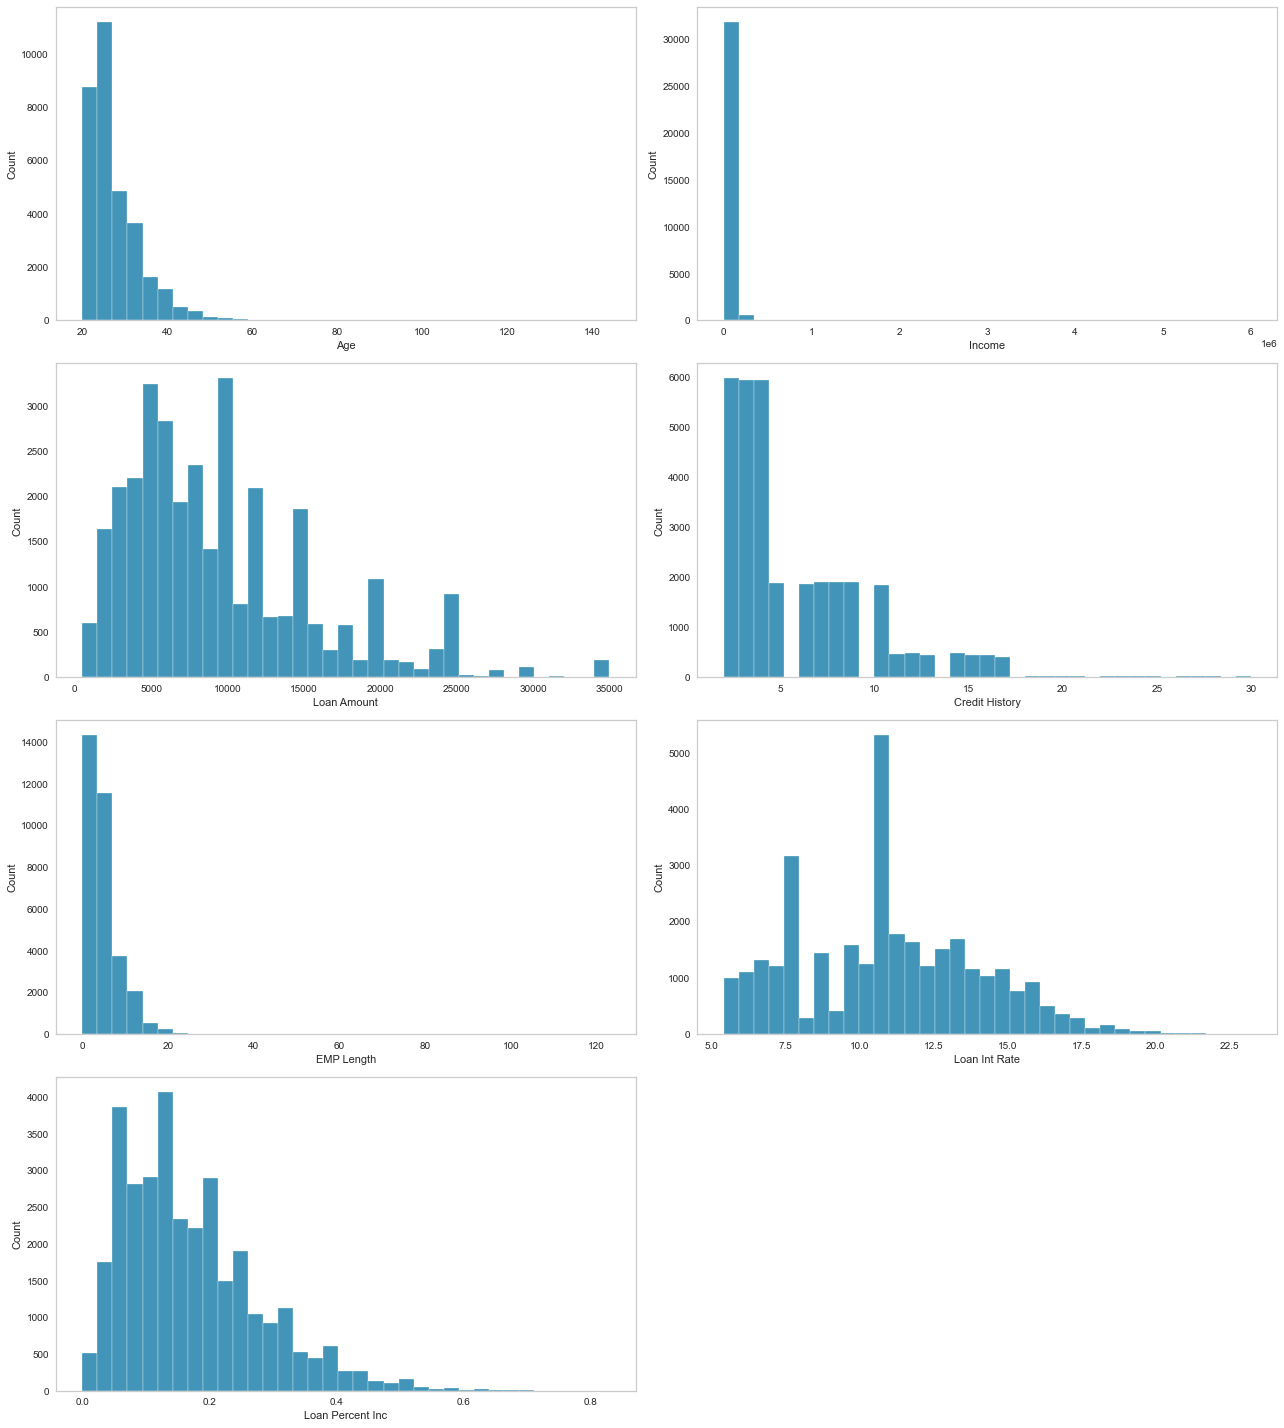

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(18, 20))
for i in range(0, len(list(numerical))):
    plt.subplot(4, 2, i+1)
    sns.histplot(x=Credits[list(numerical)[i]],bins = 35)
    plt.tight_layout()

### Outliers

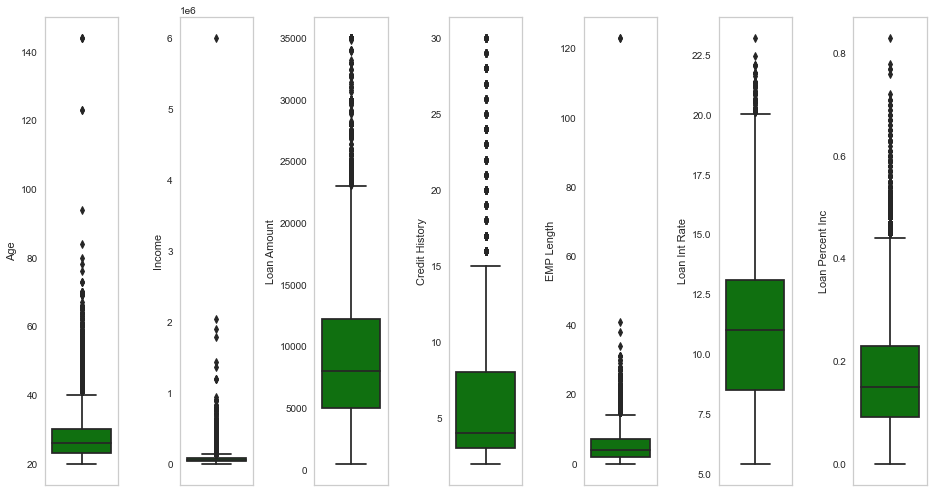

In [18]:
plt.figure(figsize=(15, 7))
for i in range(0, len(numerical)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=Credits[numerical[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation

In [19]:
# plot correlation heatmap to find out correlations

Credits.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,Income,Loan Amount,Credit History,EMP Length,Loan Int Rate,Loan Percent Inc
Age,1.0,0.1732,0.05079,0.8591,0.1615,0.01185,-0.04241
Income,0.1732,1.0,0.2668,0.118,0.1352,0.0007464,-0.2545
Loan Amount,0.05079,0.2668,1.0,0.04197,0.1139,0.1395,0.5726
Credit History,0.8591,0.118,0.04197,1.0,0.1431,0.01576,-0.03169
EMP Length,0.1615,0.1352,0.1139,0.1431,1.0,-0.05126,-0.05413
Loan Int Rate,0.01185,0.0007464,0.1395,0.01576,-0.05126,1.0,0.1145
Loan Percent Inc,-0.04241,-0.2545,0.5726,-0.03169,-0.05413,0.1145,1.0


### Exploratory Data

### `Age`

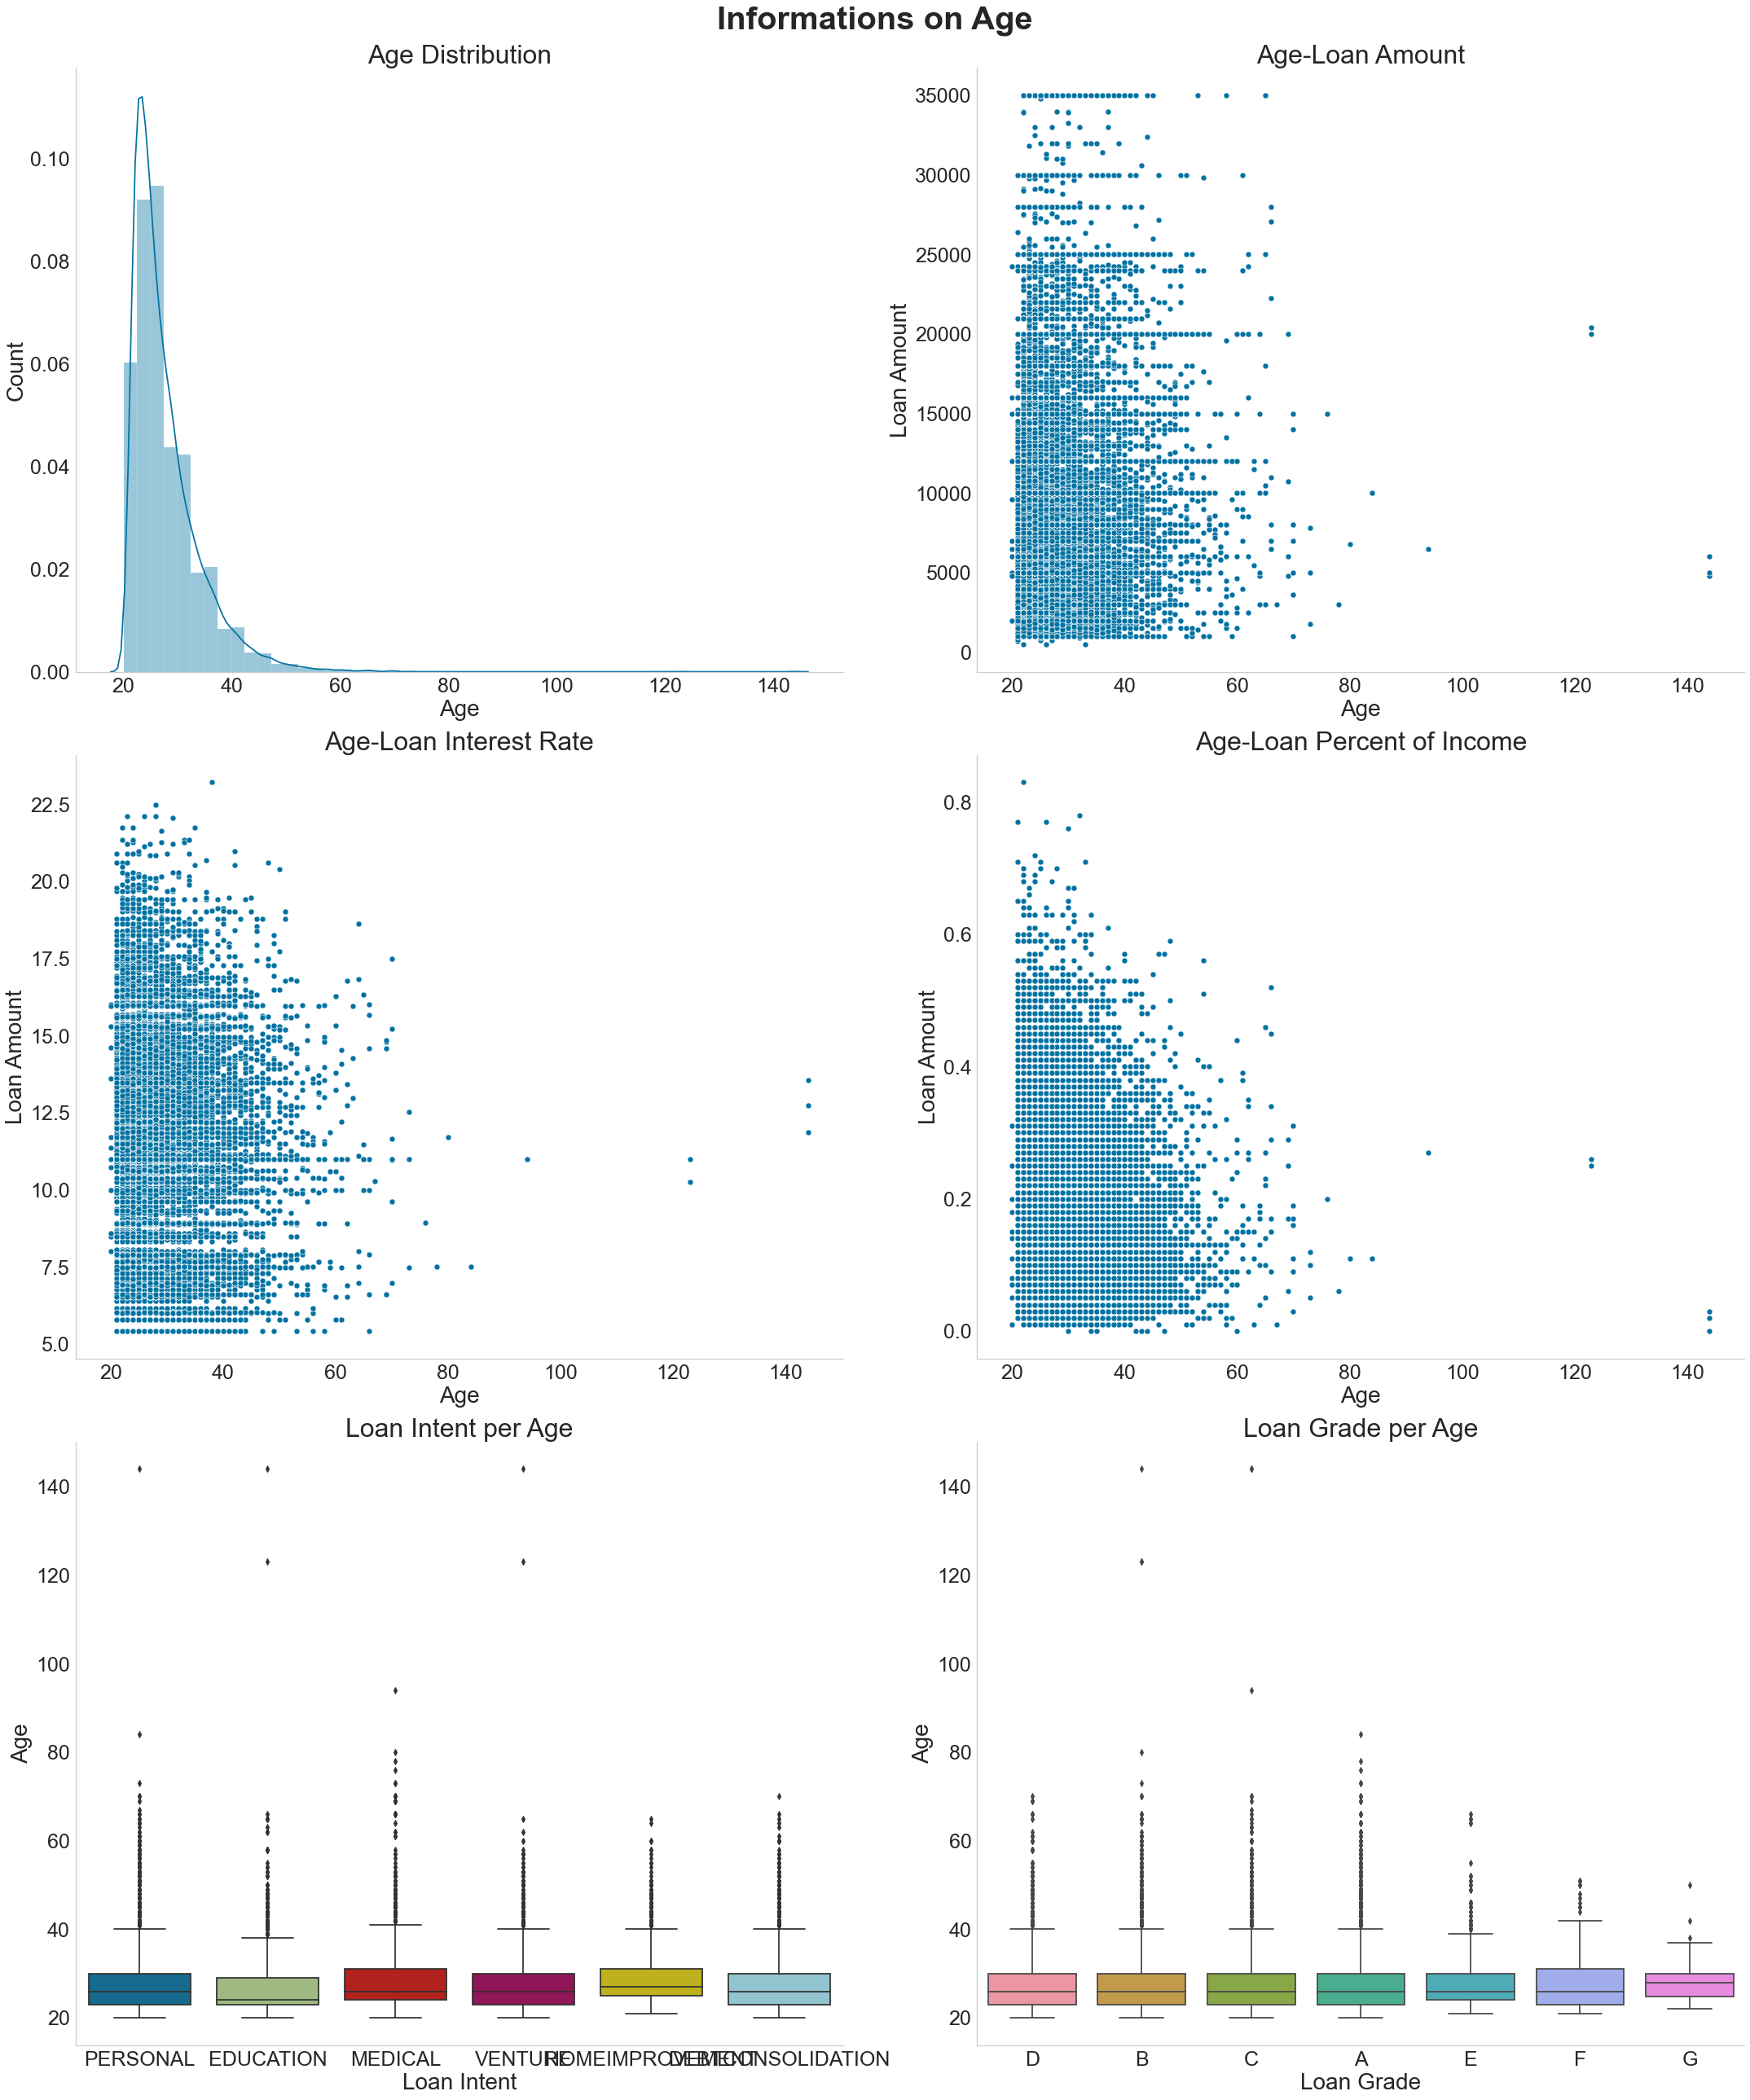

In [20]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(30,36))
fig.suptitle("Informations on Age", fontsize=40,fontweight='bold', verticalalignment="bottom")

# Plot 1
plt.subplot(3,2,1)
ax1 = sns.distplot(x = Credits['Age'], kde = True,ax=ax1)
ax1.set_ylabel('Count',fontsize=28,fontweight='normal')    
ax1.set_xlabel('Age',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Age Distribution',fontsize=32, fontweight='normal')

# Plot 2
plt.subplot(3,2,2)
ax2 = sns.scatterplot(x='Age', y='Loan Amount',ax=ax2, data=Credits)
ax2.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax2.set_xlabel('Age',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Age-Loan Amount',fontsize=32, fontweight='normal')

# Plot 3
plt.subplot(3,2,3)
ax3 = sns.scatterplot(x='Age', y='Loan Int Rate',ax=ax3, data=Credits)
ax3.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax3.set_xlabel('Age',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Age-Loan Interest Rate',fontsize=32, fontweight='normal')

# Plot 4
plt.subplot(3,2,4)
ax4 = sns.scatterplot(x='Age', y='Loan Percent Inc',ax=ax4, data=Credits)
ax4.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax4.set_xlabel('Age',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Age-Loan Percent of Income',fontsize=32, fontweight='normal')

# Plot 5
plt.subplot(3,2,5)
ax5 = sns.boxplot(x='Loan Intent', y='Age',ax=ax5, data=Credits)
ax5.set_ylabel('Age',fontsize=28,fontweight='normal')    
ax5.set_xlabel('Loan Intent',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_title('Loan Intent per Age',fontsize=32, fontweight='normal')

# Plot 6
plt.subplot(3,2,6)
ax6 = sns.boxplot(x='Loan Grade', y='Age',ax=ax6, data=Credits)
ax6.set_ylabel('Age',fontsize=28,fontweight='normal')    
ax6.set_xlabel('Loan Grade',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Loan Grade per Age',fontsize=32, fontweight='normal')

plt.tight_layout()

### `Income`

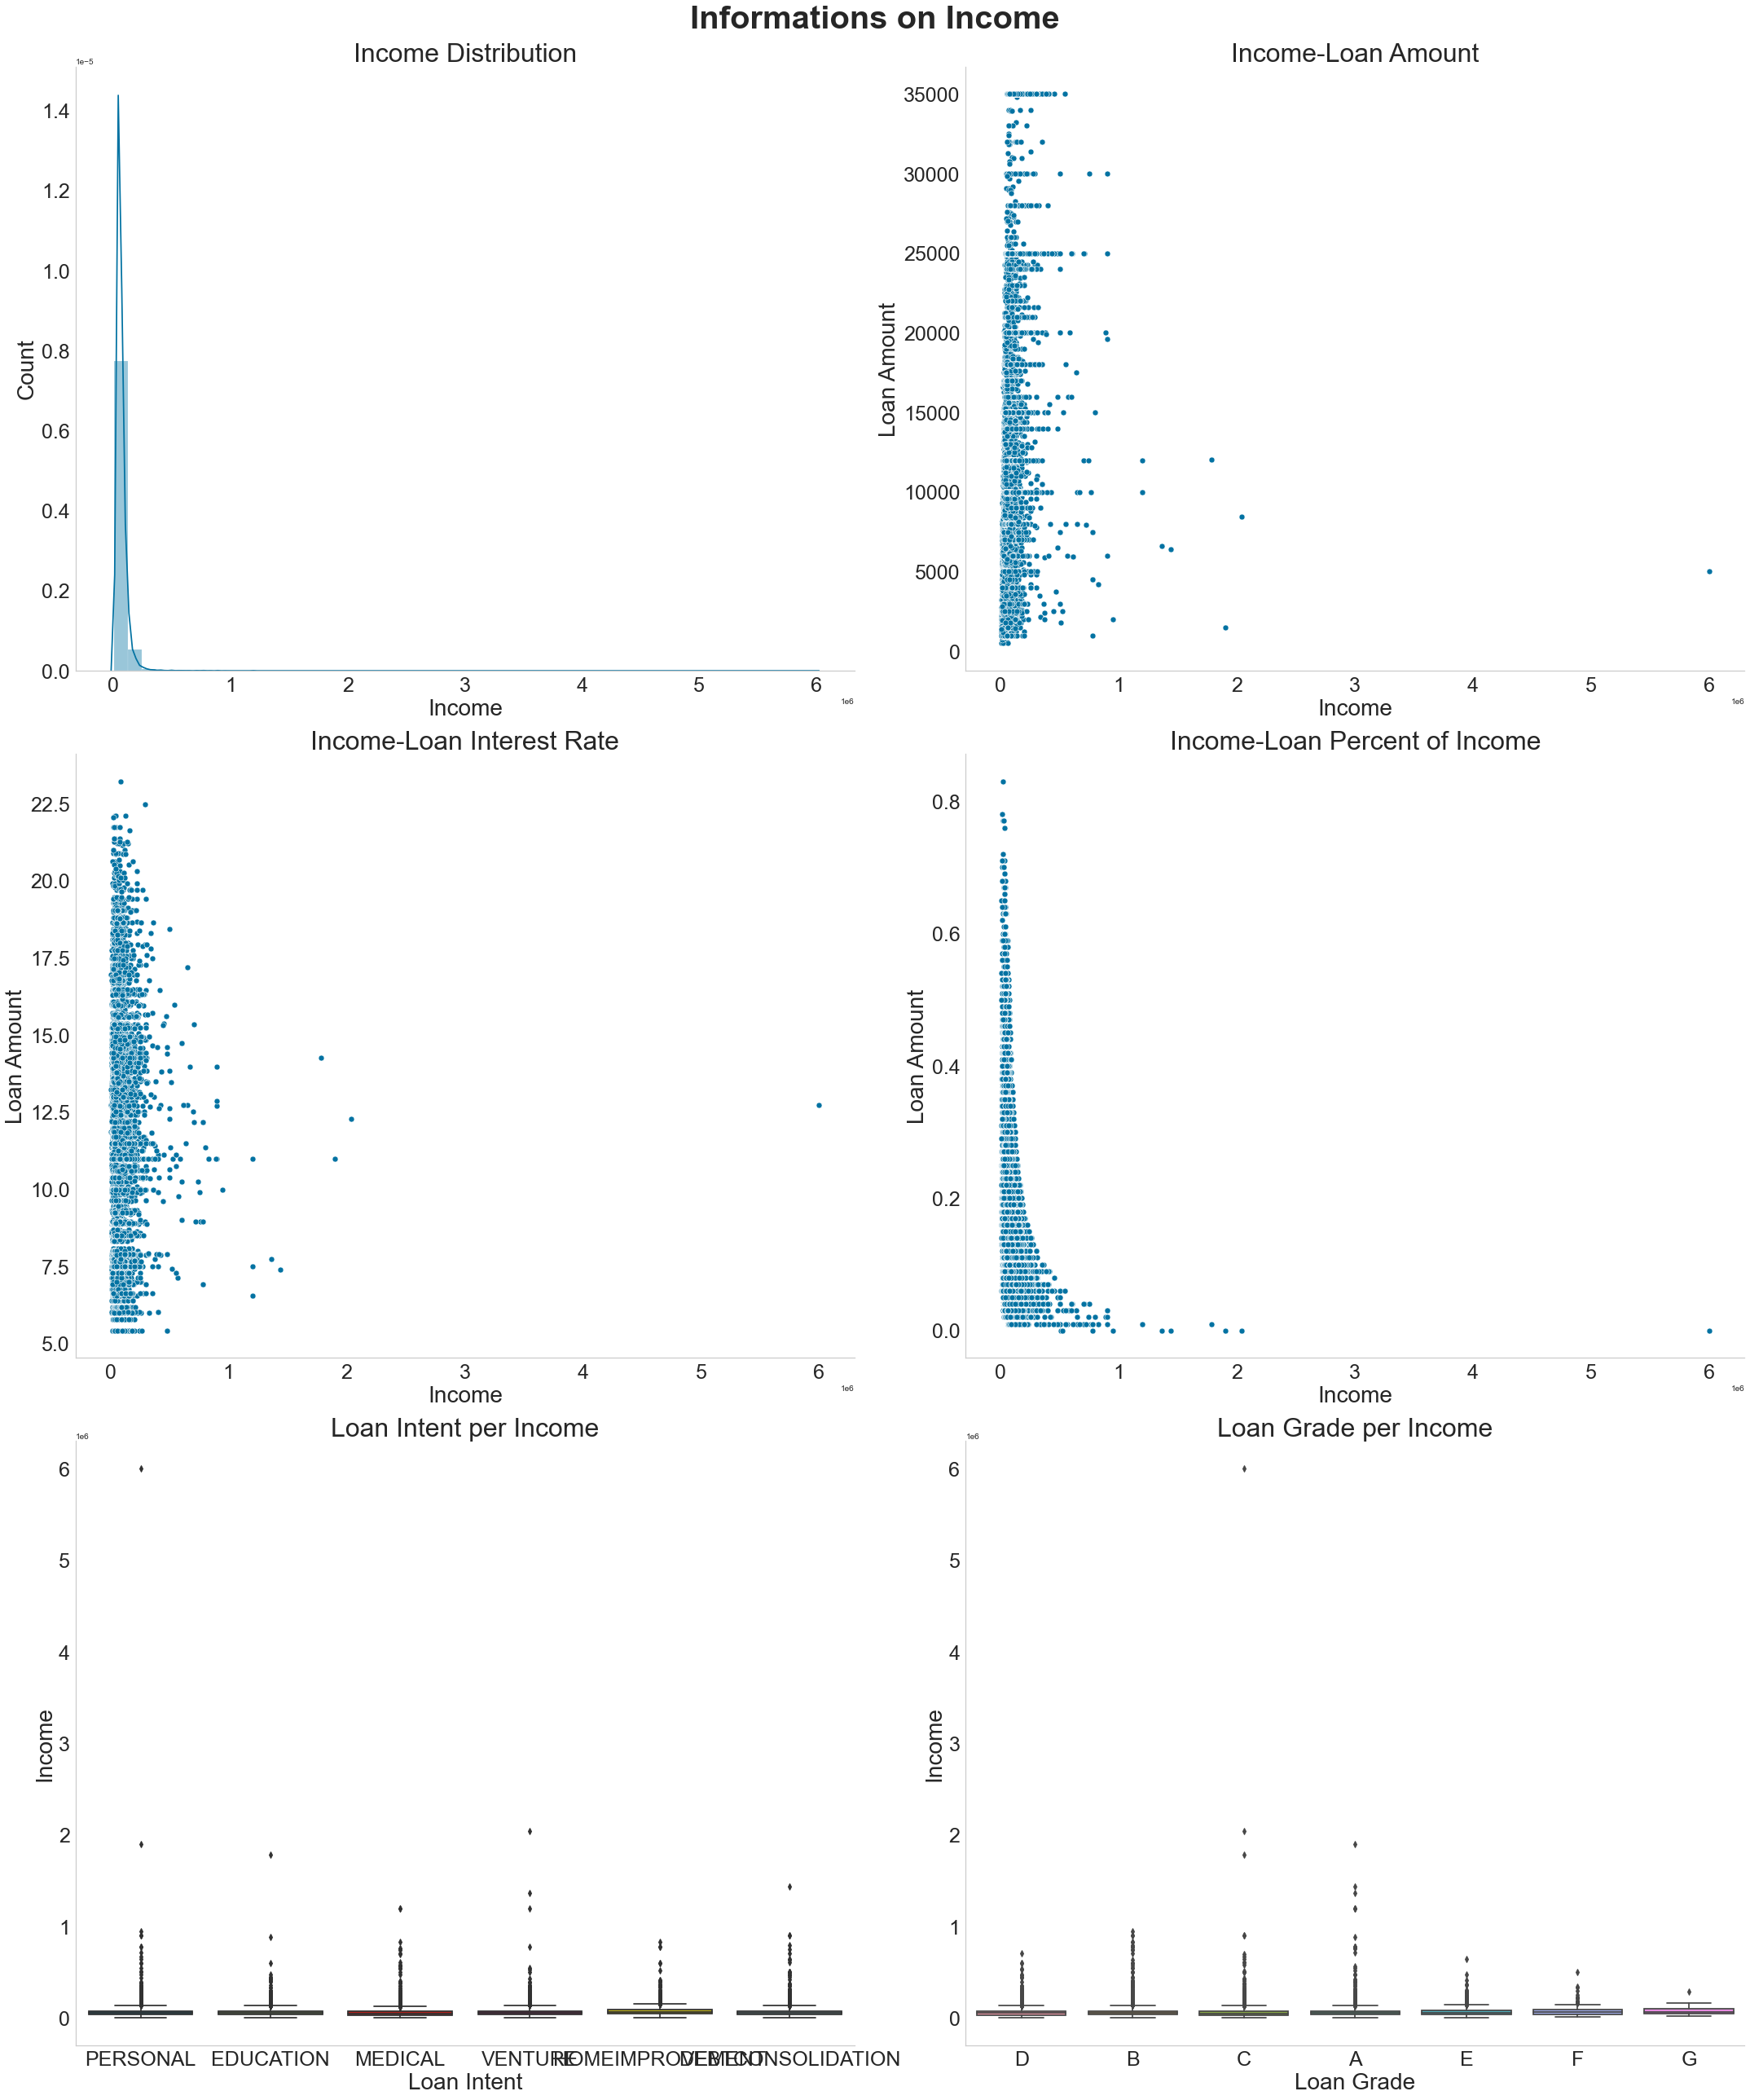

In [21]:
fig, ((ax7, ax8), (ax9, ax10), (ax11,ax12)) = plt.subplots(3,2,figsize=(30,36))
fig.suptitle("Informations on Income", fontsize=40,fontweight='bold', verticalalignment="bottom")

# Plot 1
plt.subplot(3,2,1)
ax7 = sns.distplot(x = Credits['Income'], kde = True,ax=ax7)
ax7.set_ylabel('Count',fontsize=28,fontweight='normal')    
ax7.set_xlabel('Income',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_title('Income Distribution',fontsize=32, fontweight='normal')

# Plot 2
plt.subplot(3,2,2)
ax8 = sns.scatterplot(x='Income', y='Loan Amount',ax=ax8, data=Credits)
ax8.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax8.set_xlabel('Income',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.set_title('Income-Loan Amount',fontsize=32, fontweight='normal')

# Plot 3
plt.subplot(3,2,3)
ax9 = sns.scatterplot(x='Income', y='Loan Int Rate',ax=ax9, data=Credits)
ax9.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax9.set_xlabel('Income',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('Income-Loan Interest Rate',fontsize=32, fontweight='normal')

# Plot 4
plt.subplot(3,2,4)
ax10 = sns.scatterplot(x='Income', y='Loan Percent Inc',ax=ax10, data=Credits)
ax10.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax10.set_xlabel('Income',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('Income-Loan Percent of Income',fontsize=32, fontweight='normal')

# Plot 5
plt.subplot(3,2,5)
ax11 = sns.boxplot(x='Loan Intent', y='Income',ax=ax11, data=Credits)
ax11.set_ylabel('Income',fontsize=28,fontweight='normal')    
ax11.set_xlabel('Loan Intent',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.set_title('Loan Intent per Income',fontsize=32, fontweight='normal')

# Plot 6
plt.subplot(3,2,6)
ax12 = sns.boxplot(x='Loan Grade', y='Income',ax=ax12, data=Credits)
ax12.set_ylabel('Income',fontsize=28,fontweight='normal')    
ax12.set_xlabel('Loan Grade',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.set_title('Loan Grade per Income',fontsize=32, fontweight='normal')

plt.tight_layout()

### `Home Ownership`

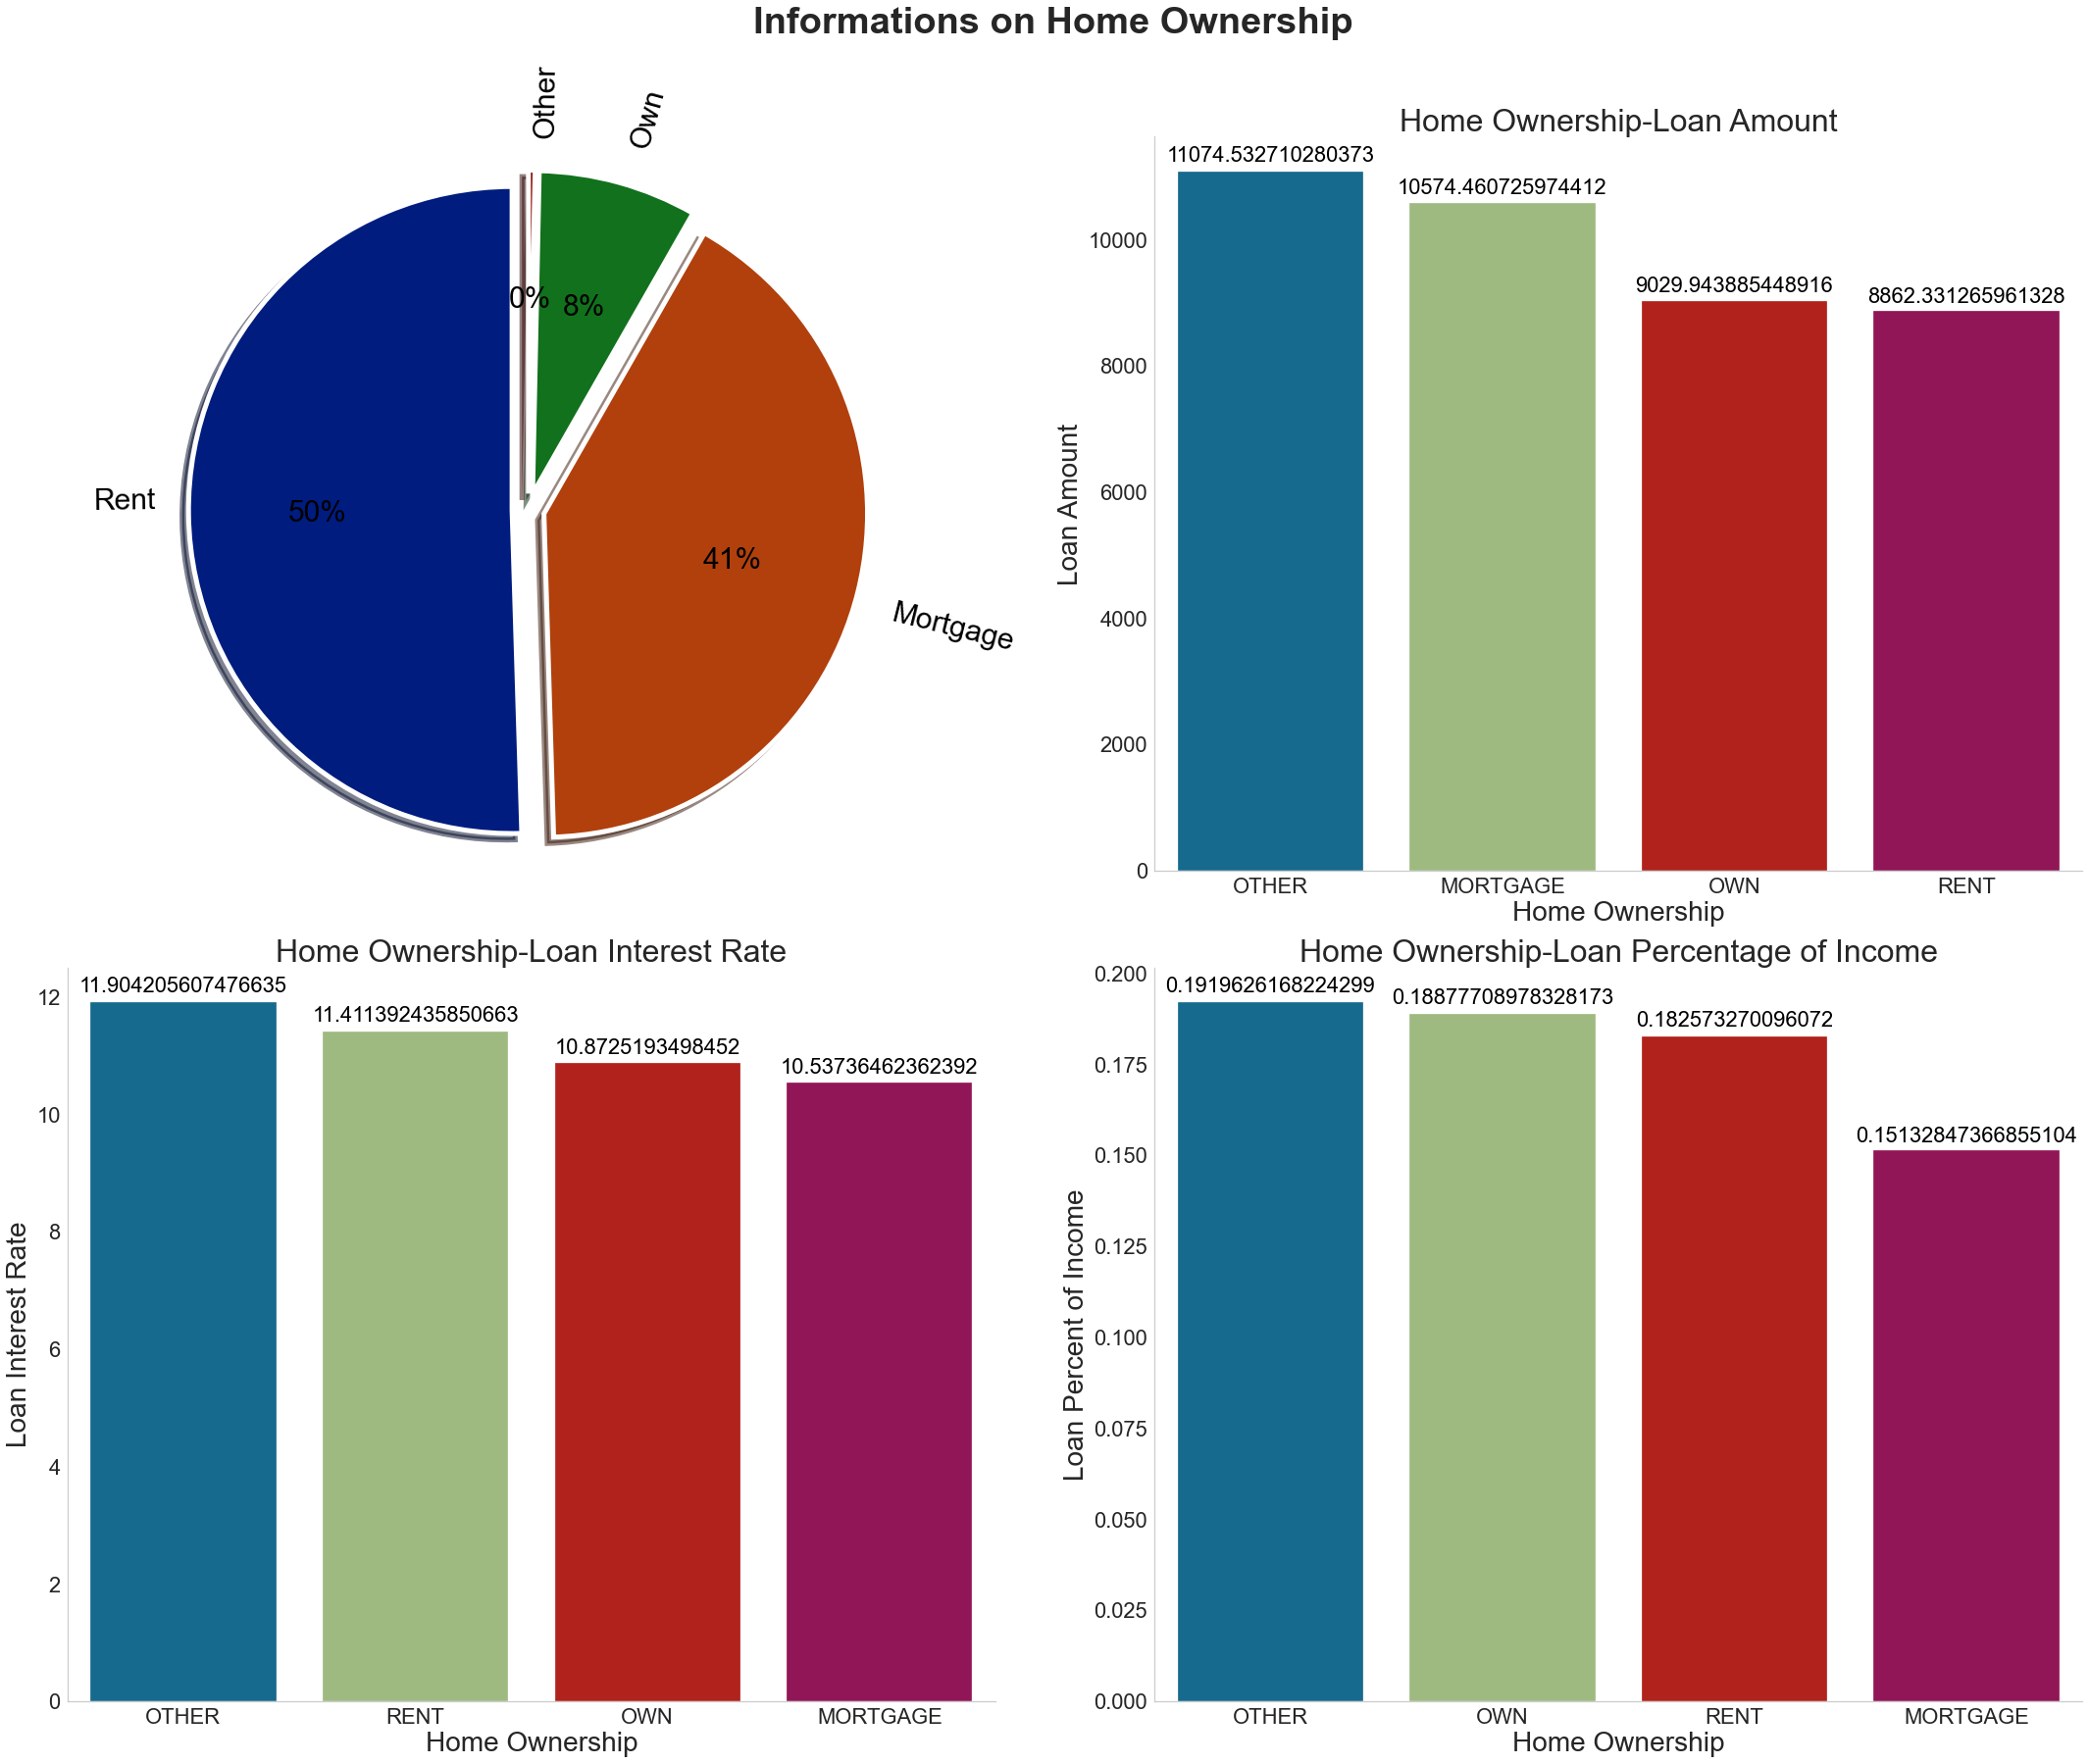

In [22]:
fig, ((ax13, ax14), (ax15, ax16)) = plt.subplots(2,2,figsize=(30,25))
fig.suptitle("Informations on Home Ownership", fontsize=38,fontweight='bold', verticalalignment="bottom")

# Plot 1
plt.subplot(2,2,1)
colors = sns.color_palette('dark')
explode = [0.05, 0.05, 0.05, 0.05]
labels = 'Rent','Mortgage','Own','Other'
plt.pie([len(Credits['Home Ownership'][Credits['Home Ownership']=='RENT']),len(Credits['Home Ownership'][Credits['Home Ownership']=='MORTGAGE']),len(Credits['Home Ownership'][Credits['Home Ownership']=='OWN']),len(Credits['Home Ownership'][Credits['Home Ownership']=='OTHER'])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 90,
            textprops = {'color': 'Black','fontsize':30},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
#plt.title('Home Ownership Distribution',fontsize=35, fontweight='normal')

# Plot 2
Cre_home = pd.DataFrame(Credits.groupby('Home Ownership', as_index=False)['Loan Amount'].mean())
Cre_home = Cre_home.sort_values(by='Loan Amount', ascending=False)

plt.subplot(2,2,2)
ax14 = sns.barplot(x='Home Ownership', y='Loan Amount',ax=ax14, data=Cre_home)
for i in ax14.patches:    
    ax14.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 22, rotation = 0, color = 'black')
ax14.set_ylabel('Loan Amount',fontsize=28,fontweight='normal')    
ax14.set_xlabel('Home Ownership',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.set_title('Home Ownership-Loan Amount',fontsize=32, fontweight='normal')

# Plot 3
Cre_home2 = pd.DataFrame(Credits.groupby('Home Ownership', as_index=False)['Loan Int Rate'].mean())
Cre_home2 = Cre_home2.sort_values(by='Loan Int Rate', ascending=False)

plt.subplot(2,2,3)
ax15 = sns.barplot(x='Home Ownership', y='Loan Int Rate',ax=ax15, data=Cre_home2)
for i in ax15.patches:    
    ax15.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 22, rotation = 0, color = 'black')
ax15.set_ylabel('Loan Interest Rate',fontsize=28,fontweight='normal')    
ax15.set_xlabel('Home Ownership',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax15.spines['right'].set_visible(False)
ax15.spines['top'].set_visible(False)
ax15.set_title('Home Ownership-Loan Interest Rate',fontsize=32, fontweight='normal')

# Plot 4
Cre_home3 = pd.DataFrame(Credits.groupby('Home Ownership', as_index=False)['Loan Percent Inc'].mean())
Cre_home3 = Cre_home3.sort_values(by='Loan Percent Inc', ascending=False)

plt.subplot(2,2,4)
ax16 = sns.barplot(x='Home Ownership', y='Loan Percent Inc',ax=ax16, data=Cre_home3)
for i in ax16.patches:    
    ax16.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 22, rotation = 0, color = 'black')
ax16.set_ylabel('Loan Percent of Income',fontsize=28,fontweight='normal')    
ax16.set_xlabel('Home Ownership',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax16.spines['right'].set_visible(False)
ax16.spines['top'].set_visible(False)
ax16.set_title('Home Ownership-Loan Percentage of Income',fontsize=32, fontweight='normal')

plt.tight_layout()

posx and posy should be finite values
posx and posy should be finite values


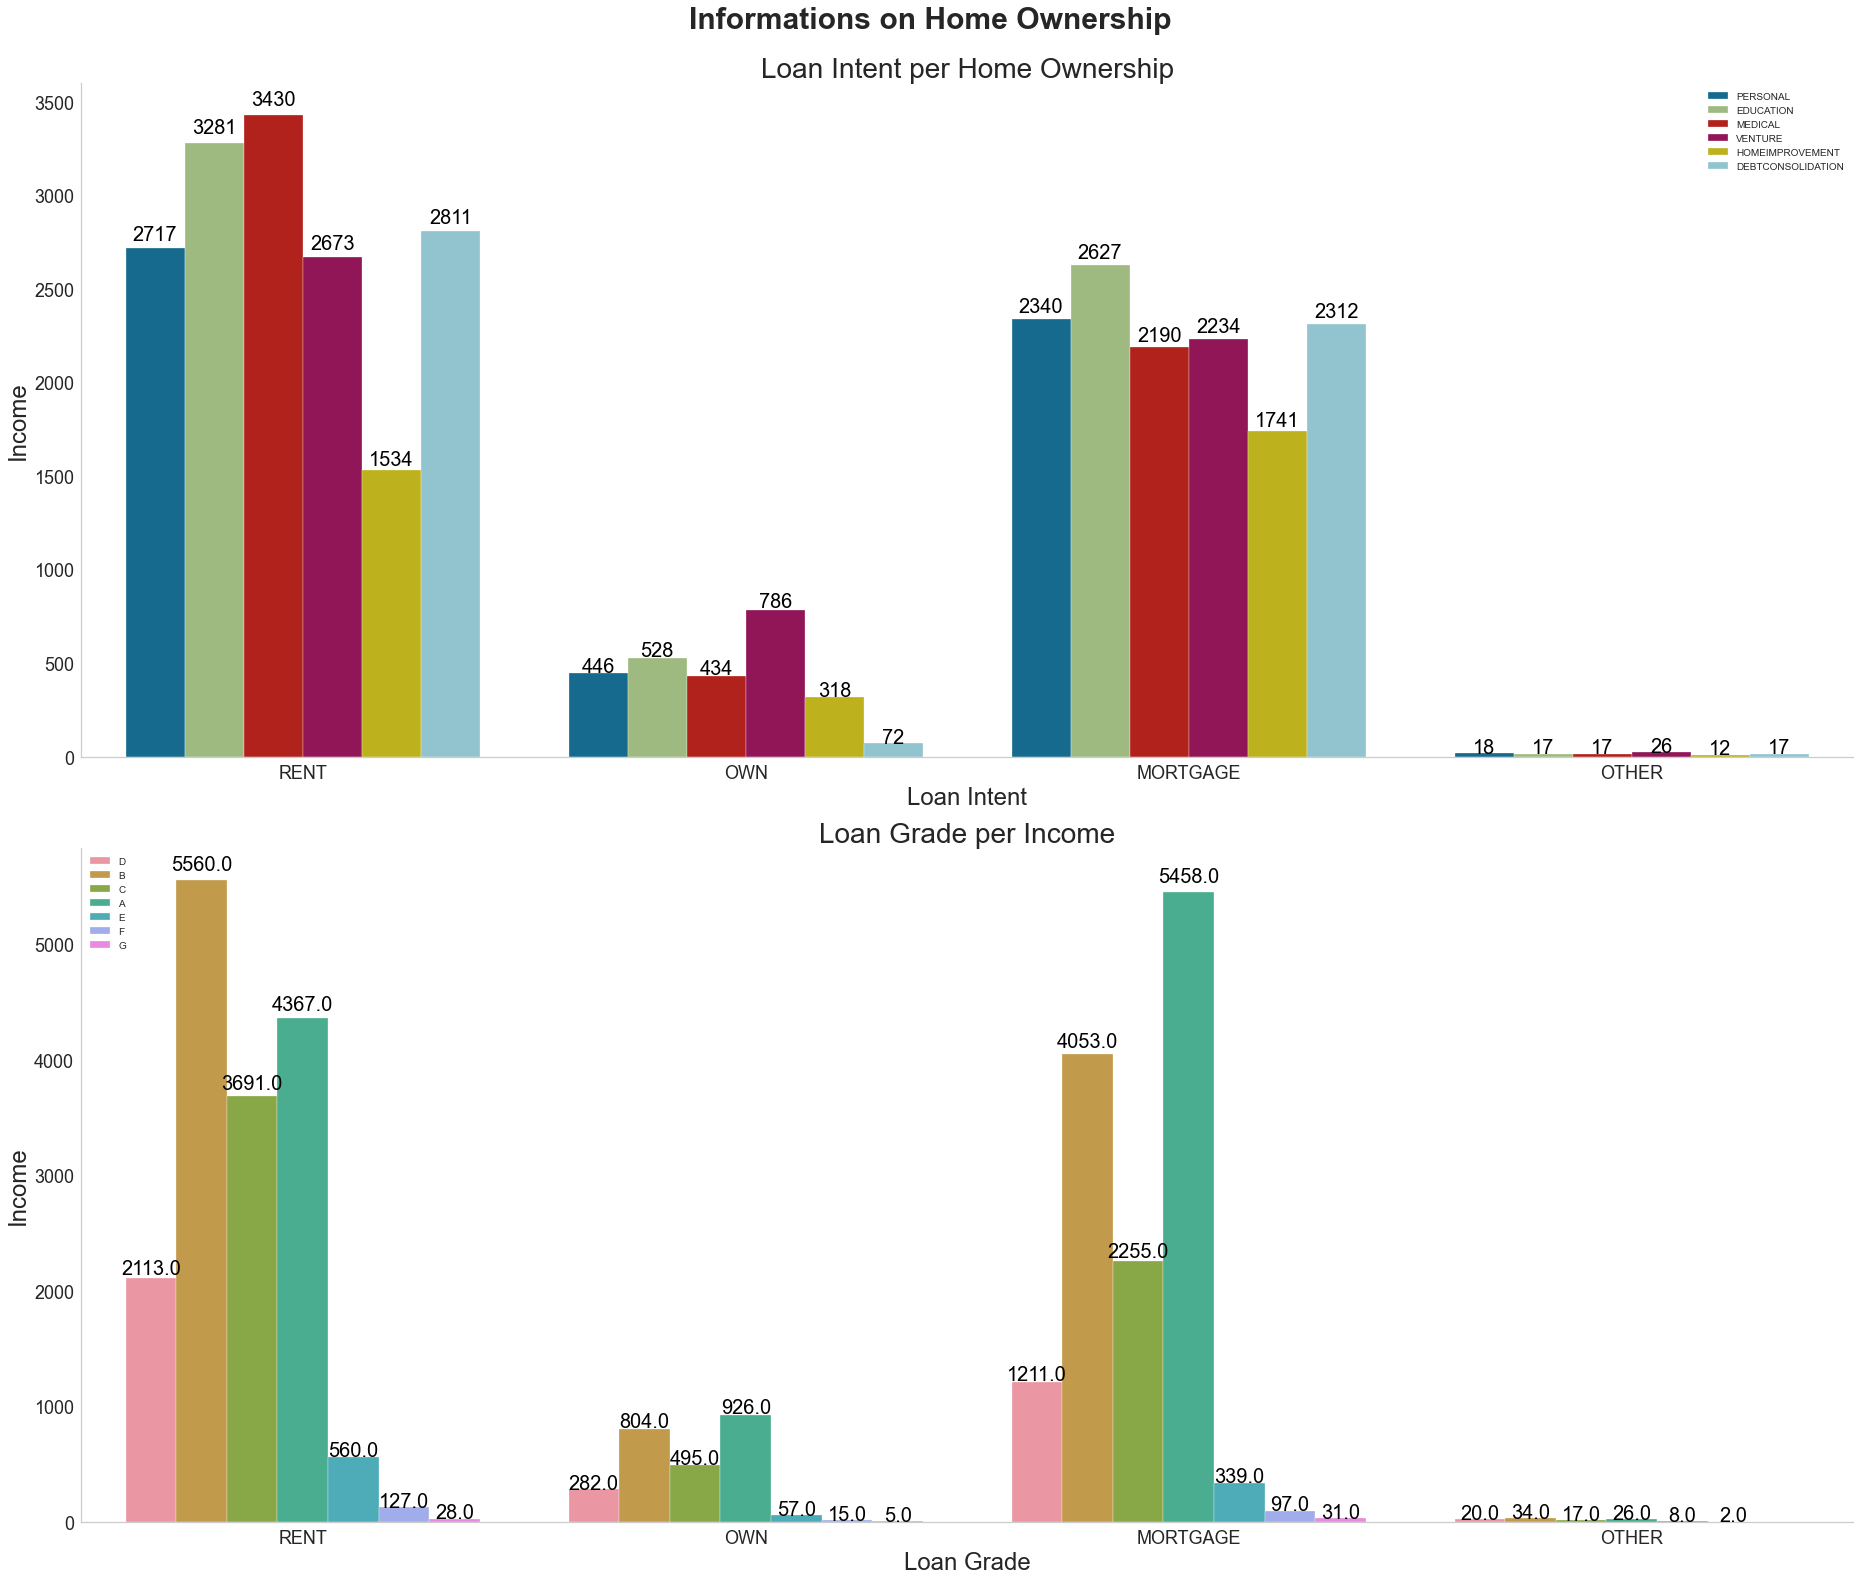

In [23]:
fig, ((ax17, ax18)) = plt.subplots(2,1,figsize=(26,22))
fig.suptitle("Informations on Home Ownership", fontsize=30,fontweight='bold', verticalalignment="bottom")

# Plot 5
plt.subplot(2,1,1)
ax17 = sns.countplot(x='Home Ownership', hue='Loan Intent',ax=ax17, data=Credits)
for i in ax17.patches:    
    ax17.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 20, rotation = 0, color = 'black')
ax17.set_ylabel('Income',fontsize=24,fontweight='normal')    
ax17.set_xlabel('Loan Intent',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax17.spines['right'].set_visible(False)
ax17.spines['top'].set_visible(False)
ax17.set_title('Loan Intent per Home Ownership',fontsize=28, fontweight='normal')
ax17.legend(loc='best')

# Plot 6
plt.subplot(2,1,2)
ax18 = sns.countplot(x='Home Ownership', hue='Loan Grade',ax=ax18, data=Credits)
for i in ax18.patches:    
    ax18.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 20, rotation = 0, color = 'black')
ax18.set_ylabel('Income',fontsize=24,fontweight='normal')    
ax18.set_xlabel('Loan Grade',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
ax18.spines['right'].set_visible(False)
ax18.spines['top'].set_visible(False)
ax18.set_title('Loan Grade per Income',fontsize=28, fontweight='normal')
ax18.legend(loc='best')

plt.tight_layout()

### `Loan Status`

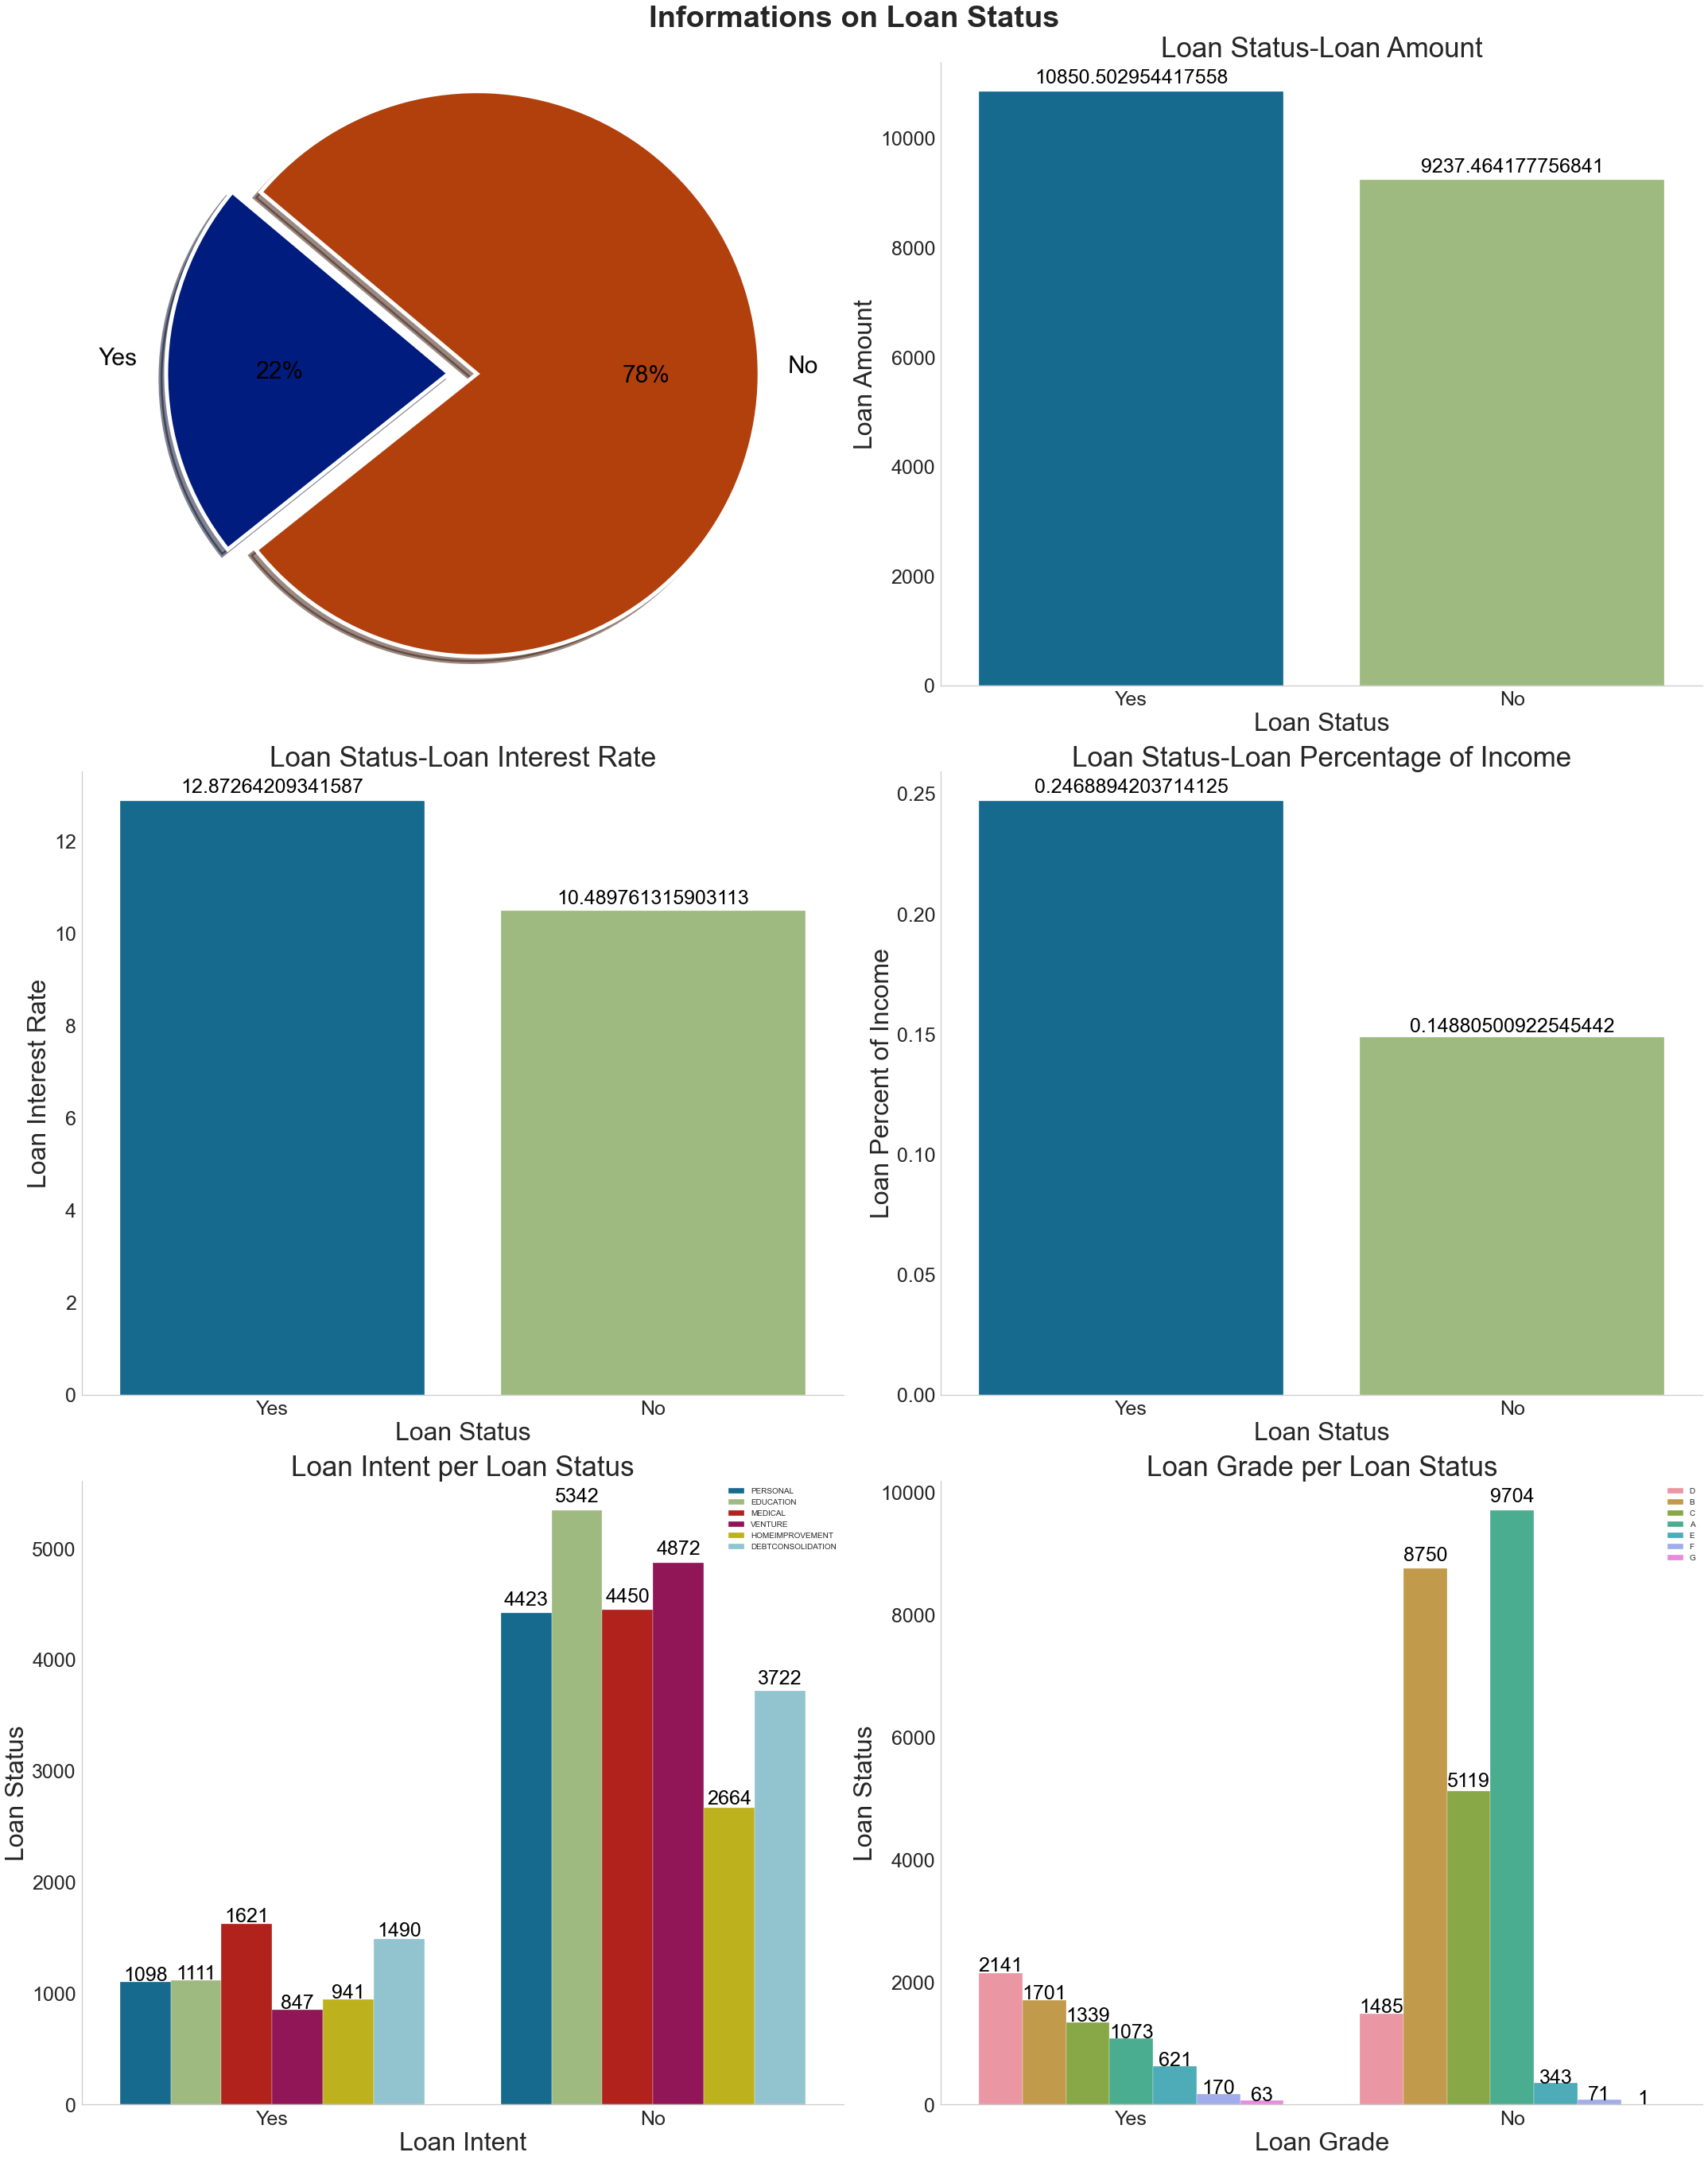

In [34]:
fig, ((ax19, ax20), (ax21, ax22), (ax23,ax24)) = plt.subplots(3,2,figsize=(30,38))
fig.suptitle("Informations on Loan Status", fontsize=38,fontweight='bold', verticalalignment="bottom")

# Plot 1
plt.subplot(3,2,1)
colors = sns.color_palette('dark')
explode = [0.05, 0.05]
labels = 'Yes','No'
plt.pie([len(Credits['Loan Status'][Credits['Loan Status']=='Yes']),len(Credits['Loan Status'][Credits['Loan Status']=='No'])],
            labels=labels,
            colors = colors,
            autopct = '%0.0f%%',
            explode = explode,
            shadow = 'True',
            startangle = 140,
            textprops = {'color': 'Black','fontsize':30},
            wedgeprops = {'linewidth': 5},
            frame = 'True' ,
            center = (0.1,0.1),
            rotatelabels = 'true')
plt.axis('off')
#plt.title('Home Ownership Distribution',fontsize=35, fontweight='normal')

# Plot 2
Cre_stat = pd.DataFrame(Credits.groupby('Loan Status', as_index=False)['Loan Amount'].mean())
Cre_stat = Cre_stat.sort_values(by='Loan Amount', ascending=False)

plt.subplot(3,2,2)
ax20 = sns.barplot(x='Loan Status', y='Loan Amount',ax=ax20, data=Cre_stat)
for i in ax20.patches:    
    ax20.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 25, rotation = 0, color = 'black')
ax20.set_ylabel('Loan Amount',fontsize=32,fontweight='normal')    
ax20.set_xlabel('Loan Status',fontsize=32,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax20.spines['right'].set_visible(False)
ax20.spines['top'].set_visible(False)
ax20.set_title('Loan Status-Loan Amount',fontsize=35, fontweight='normal')

# Plot 3
Cre_stat2 = pd.DataFrame(Credits.groupby('Loan Status', as_index=False)['Loan Int Rate'].mean())
Cre_stat2 = Cre_stat2.sort_values(by='Loan Int Rate', ascending=False)

plt.subplot(3,2,3)
ax21 = sns.barplot(x='Loan Status', y='Loan Int Rate',ax=ax21, data=Cre_stat2)
for i in ax21.patches:    
    ax21.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 25, rotation = 0, color = 'black')
ax21.set_ylabel('Loan Interest Rate',fontsize=32,fontweight='normal')    
ax21.set_xlabel('Loan Status',fontsize=32,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax21.spines['right'].set_visible(False)
ax21.spines['top'].set_visible(False)
ax21.set_title('Loan Status-Loan Interest Rate',fontsize=35, fontweight='normal')

# Plot 4
Cre_stat3 = pd.DataFrame(Credits.groupby('Loan Status', as_index=False)['Loan Percent Inc'].mean())
Cre_stat3 = Cre_stat3.sort_values(by='Loan Percent Inc', ascending=False)

plt.subplot(3,2,4)
ax22 = sns.barplot(x='Loan Status', y='Loan Percent Inc',ax=ax22, data=Cre_stat3)
for i in ax22.patches:    
    ax22.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 25, rotation = 0, color = 'black')
ax22.set_ylabel('Loan Percent of Income',fontsize=32,fontweight='normal')    
ax22.set_xlabel('Loan Status',fontsize=32,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax22.spines['right'].set_visible(False)
ax22.spines['top'].set_visible(False)
ax22.set_title('Loan Status-Loan Percentage of Income',fontsize=35, fontweight='normal')

# Plot 5
plt.subplot(3,2,5)
ax23 = sns.countplot(x='Loan Status', hue='Loan Intent',ax=ax23, data=Credits)
for i in ax23.patches:    
    ax23.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 25, rotation = 0, color = 'black')
ax23.set_ylabel('Loan Status',fontsize=32,fontweight='normal')    
ax23.set_xlabel('Loan Intent',fontsize=32,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax23.spines['right'].set_visible(False)
ax23.spines['top'].set_visible(False)
ax23.set_title('Loan Intent per Loan Status',fontsize=35, fontweight='normal')
ax23.legend(loc='best')

# Plot 6
plt.subplot(3,2,6)
ax24 = sns.countplot(x='Loan Status', hue='Loan Grade',ax=ax24, data=Credits)
for i in ax24.patches:    
    ax24.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 25, rotation = 0, color = 'black')
ax24.set_ylabel('Loan Status',fontsize=32,fontweight='normal')    
ax24.set_xlabel('Loan Grade',fontsize=32,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax24.spines['right'].set_visible(False)
ax24.spines['top'].set_visible(False)
ax24.set_title('Loan Grade per Loan Status',fontsize=35, fontweight='normal')
ax24.legend(loc='best')

plt.tight_layout()

### Prepare Data For Machine Learning

### Imbalance Target Feature Checking

In [32]:
print('Distinct value(s) of Loan Status : ', Credits['Loan Status'].unique())
print(Credits['Loan Status'].value_counts()/float(len(Credits)))

Distinct value(s) of Loan Status :  ['Yes' 'No']
No     0.781836
Yes    0.218164
Name: Loan Status, dtype: float64


 - It is rather an imbalanced data.
 - Accuracy will not be the best tool to measure performance of the model. Precision, Recall and F1 Score are preferable.

### Train and Test Splitting 

In [ ]:
X = Credits.drop(['Loan Status'], axis=1)
Y = Credits['Loan Status']

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Splitting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

### Train and Test Set Profiling

In [ ]:
print("Train set dimension :", X_train.ndim)
print("Train set shape :", X_train.shape)
print("Train set size :", X_train.size)

In [ ]:
print("Test set dimension :", X_test.ndim)
print("Test set shape :", X_test.shape)
print("Test set size :", X_test.size)

### Data Preprocessing 

### Categorical Encoder

In [ ]:
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['Home Ownership', 'Loan Intent','Default'])
X_train = encoder.fit_transform(X_train)
X_train

In [ ]:
# For Test Set
X_test = encoder.transform(X_test)
X_test

### Ordinal Encoder

In [ ]:
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables with one-hot encoding
ordencoder = ce.OrdinalEncoder(cols=['Loan Grade'])
X_train = ordencoder.fit_transform(X_train)
X_train

In [ ]:
# For Test Set
X_test = ordencoder.transform(X_test)
X_test

### Feature Scaling

In [ ]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

In [ ]:
# For Test Set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

### Target Feature Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables with one-hot encoding
labencoder = LabelEncoder()
y_train = labencoder.fit_transform(y_train)
y_train

In [ ]:
# For Test Set
y_test = labencoder.transform(y_test)
y_test

### Machine Learning Model on Training Set

In [ ]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns = X_test.columns.get_level_values(0)

### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=50)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### Stochastic Gradient Boosting

In [ ]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = SGB_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### LightGBM

In [ ]:
# Choosing Model
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = LGBM_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### Find Importance Features with Random Forest Model

In [ ]:
# view the feature scores using 100 estimators
forest_clf = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

feature_scores = pd.Series(forest_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores.to_string())

### Find Importance Features with SGB Model

In [ ]:
# view the feature scores using 100 estimators
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

feature_scores2 = pd.Series(SGB_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores2.to_string())

### Find Importance Features with LightGBM Model

In [ ]:
# view the feature scores using 100 estimators
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

feature_scores3 = pd.Series(LGBM_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores3.to_string())

### Model Implementation using PyCaret

### Preprocessing with Pycaret

In [35]:
# Preprocessing 
grid = setup(data=Credits , target= 'Loan Status', data_split_shuffle= True, data_split_stratify= True, session_id= 50,
            ordinal_features = {'Loan Grade' : ['G','F','E','D','C','B','A']}, normalize = True, normalize_method = 'robust',
            ignore_low_variance = True, fix_imbalance = False, remove_outliers = False) 

,Description,Value
0,session_id,50
1,Target,Loan Status
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(32581, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,True
9,High Cardinality Features,False


### Comparing Models Performance

In [36]:
## Evaluate and compare models
best = compare_models(n_select = 3, sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9355,0.9471,0.7216,0.9769,0.8300,0.7913,0.8052,0.0760
rf,Random Forest Classifier,0.9334,0.9300,0.7146,0.9730,0.8239,0.7840,0.7983,0.4480
gbc,Gradient Boosting Classifier,0.9293,0.9275,0.7116,0.9523,0.8144,0.7718,0.7844,0.5440
et,Extra Trees Classifier,0.9195,0.9137,0.6786,0.9347,0.7861,0.7381,0.7526,0.3790
ada,Ada Boost Classifier,0.8858,0.8972,0.6565,0.7851,0.7150,0.6443,0.6484,0.1830
knn,K Neighbors Classifier,0.8929,0.8615,0.6117,0.8565,0.7135,0.6500,0.6639,0.3190
lr,Logistic Regression,0.8527,0.8604,0.5025,0.7387,0.5980,0.5118,0.5261,0.6420
lda,Linear Discriminant Analysis,0.8526,0.8587,0.5120,0.7318,0.6023,0.5153,0.5278,0.0390
dt,Decision Tree Classifier,0.8877,0.8432,0.7644,0.7327,0.7481,0.6758,0.6762,0.0400
qda,Quadratic Discriminant Analysis,0.6662,0.8331,0.8364,0.3830,0.5240,0.3202,0.3787,0.0210


### Creating ML Models

### LGBM Classifier

In [37]:
LGBM = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9303,0.9365,0.7042,0.9669,0.8149,0.7733,0.7880
1,0.9325,0.9411,0.7048,0.9804,0.8201,0.7799,0.7960
2,0.9334,0.9459,0.7068,0.9832,0.8224,0.7828,0.7989
3,0.9347,0.9499,0.7209,0.9729,0.8281,0.7889,0.8024
4,0.9369,0.9503,0.7209,0.9863,0.8329,0.7952,0.8100
5,0.9369,0.9507,0.7369,0.9658,0.8360,0.7978,0.8090
6,0.9368,0.9414,0.7223,0.9836,0.8329,0.7951,0.8095
7,0.9430,0.9609,0.7525,0.9816,0.8519,0.8174,0.8285
8,0.9399,0.9495,0.7364,0.9839,0.8423,0.8062,0.8191


In [38]:
print(LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Random Forest Classifier

In [39]:
RF = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9294,0.9177,0.6982,0.9693,0.8117,0.7697,0.7854
1,0.9312,0.9304,0.7008,0.9776,0.8164,0.7754,0.7917
2,0.9316,0.9282,0.7008,0.9803,0.8173,0.7767,0.7932
3,0.9329,0.9235,0.7189,0.9650,0.8239,0.7836,0.7966
4,0.9325,0.9310,0.7068,0.9778,0.8205,0.7803,0.7958
5,0.9351,0.9356,0.7349,0.9581,0.8318,0.7925,0.8032
6,0.9373,0.9299,0.7264,0.9810,0.8347,0.7970,0.8107
7,0.9390,0.9392,0.7364,0.9786,0.8404,0.8037,0.8161
8,0.9364,0.9392,0.7264,0.9757,0.8328,0.7945,0.8077


In [40]:
print(RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)


### GBC Classifier

In [41]:
GBC = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9233,0.9111,0.6922,0.9399,0.7972,0.7512,0.7646
1,0.9263,0.9257,0.6948,0.9558,0.8047,0.7607,0.7754
2,0.9285,0.9228,0.7028,0.9589,0.8111,0.7683,0.7824
3,0.9290,0.9297,0.7149,0.9468,0.8146,0.7718,0.7834
4,0.9285,0.9325,0.6988,0.9640,0.8102,0.7676,0.7827
5,0.9299,0.9349,0.7229,0.9424,0.8182,0.7757,0.7861
6,0.9346,0.9226,0.7203,0.9728,0.8277,0.7885,0.8021
7,0.9325,0.9336,0.7344,0.9432,0.8258,0.7847,0.7941
8,0.9355,0.9374,0.7284,0.9679,0.8312,0.7924,0.8046


In [42]:
print(GBC)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### ML Models Hyperpaarmeters Tuning

### LGBM Classifier

In [43]:
tuned_LGBM = tune_model(LGBM, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9145,0.9240,0.7163,0.8683,0.7850,0.7323,0.7375
1,0.9228,0.9291,0.7329,0.8946,0.8057,0.7582,0.7641
2,0.9281,0.9352,0.7590,0.8957,0.8217,0.7771,0.7813
3,0.9233,0.9349,0.7470,0.8836,0.8096,0.7620,0.7662
4,0.9246,0.9427,0.7570,0.8808,0.8143,0.7673,0.7708
5,0.9228,0.9343,0.7751,0.8578,0.8143,0.7658,0.7674
6,0.9224,0.9361,0.7505,0.8756,0.8082,0.7599,0.7635
7,0.9294,0.9468,0.7827,0.8801,0.8285,0.7843,0.7864
8,0.9276,0.9384,0.7787,0.8756,0.8243,0.7789,0.7810


### Random Forest Classifier

In [44]:
tuned_RF = tune_model(RF, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8435,0.8853,0.7465,0.6163,0.6752,0.5733,0.5779
1,0.8409,0.8982,0.7610,0.6083,0.6762,0.5724,0.5787
2,0.8431,0.9001,0.7530,0.6148,0.6769,0.5746,0.5798
3,0.8575,0.9104,0.7550,0.6494,0.6982,0.6057,0.6086
4,0.8588,0.9055,0.7631,0.6507,0.7024,0.6106,0.6140
5,0.8856,0.9082,0.7269,0.7433,0.7350,0.6621,0.6621
6,0.8882,0.9023,0.7465,0.7420,0.7442,0.6727,0.6727
7,0.8623,0.9079,0.7807,0.6543,0.7119,0.6224,0.6265
8,0.8820,0.9092,0.7586,0.7167,0.7370,0.6611,0.6615


### GBC Classifier

In [45]:
tuned_GBC = tune_model(GBC, optimize = 'auc', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9224,0.9228,0.6982,0.9278,0.7968,0.7500,0.7616
1,0.9351,0.9371,0.7329,0.9605,0.8314,0.7922,0.8033
2,0.9356,0.9354,0.7390,0.9558,0.8335,0.7944,0.8045
3,0.9320,0.9345,0.7329,0.9432,0.8249,0.7835,0.7931
4,0.9360,0.9359,0.7309,0.9681,0.8330,0.7943,0.8063
5,0.9342,0.9347,0.7510,0.9350,0.8330,0.7926,0.8000
6,0.9329,0.9327,0.7425,0.9365,0.8283,0.7873,0.7955
7,0.9390,0.9424,0.7565,0.9543,0.8440,0.8067,0.8151
8,0.9364,0.9406,0.7445,0.9536,0.8362,0.7974,0.8069


### Model Interpretation

### LGBM Classifier

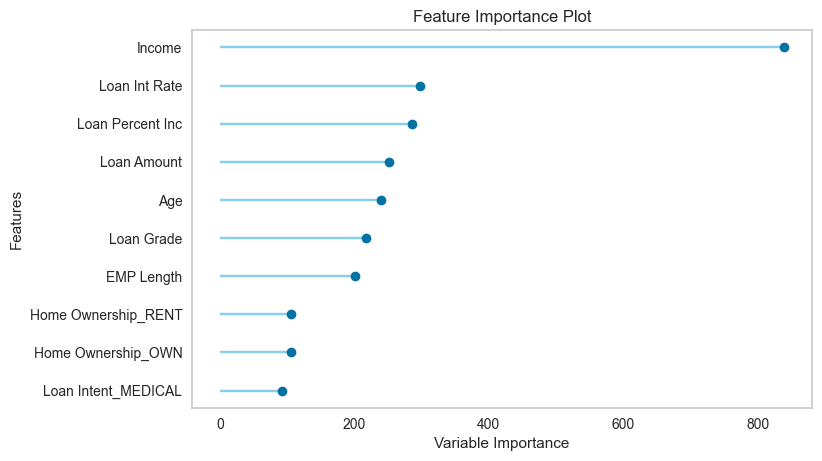

In [46]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_LGBM, plot = 'feature')

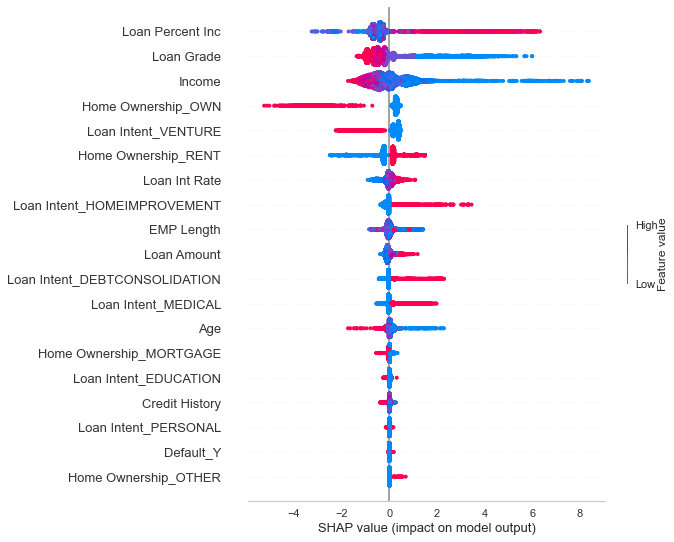

In [47]:
# Shap Model Interpretation Final Model
interpret_model(tuned_LGBM)

### Random Forest Classifer

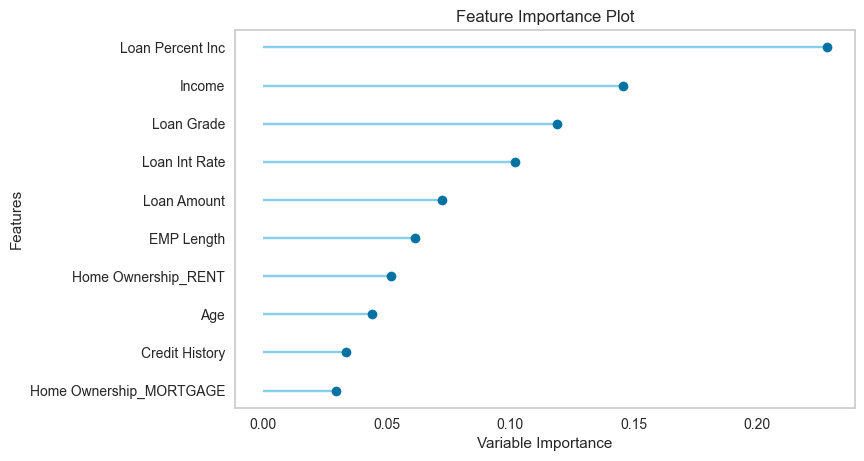

In [48]:
# Display feature and their importance
plot_model(tuned_RF, plot = 'feature')

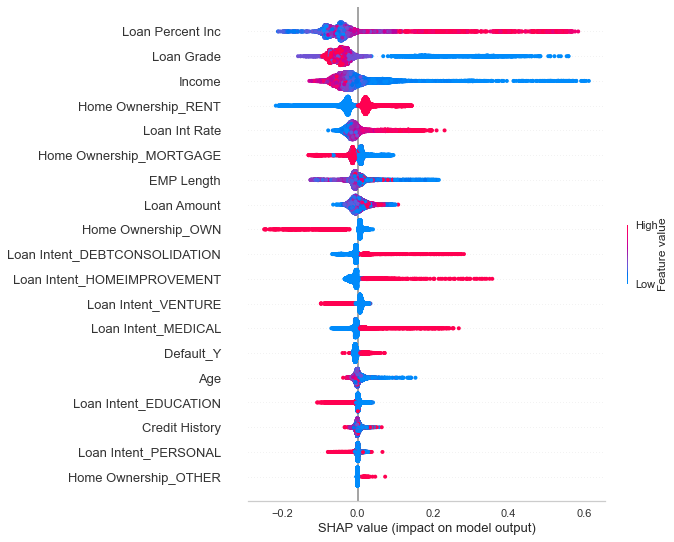

In [49]:
# Shap Model Interpretation Final Model
interpret_model(tuned_RF)

### GBC Classifier

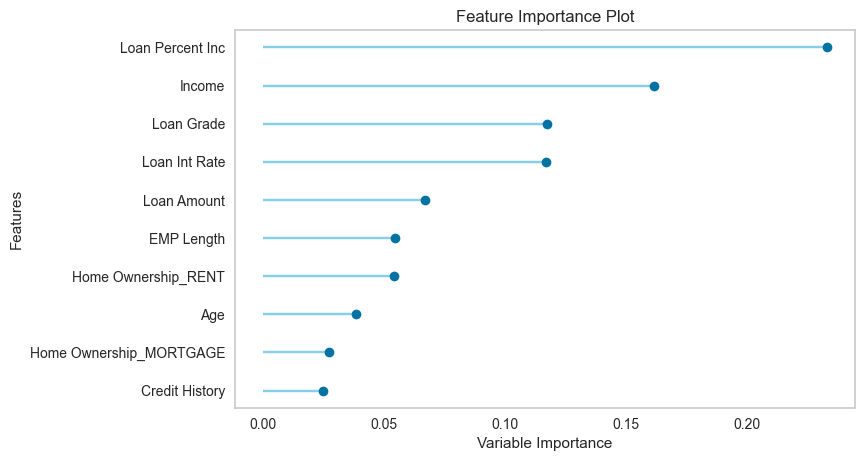

In [50]:
# Display feature and their importance
plot_model(tuned_GBC, plot = 'feature')

### Choosing The Best Model

In [51]:
print(tuned_LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predicting Model on Test / Hold Out Sample

In [52]:
predict_model(tuned_LGBM)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9372,0.9475,0.7276,0.9792,0.8349,0.7971,0.8105


,Age,Income,Loan Amount,Credit History,EMP Length,Loan Int Rate,Loan Percent Inc,Loan Grade,Home Ownership_MORTGAGE,Home Ownership_OTHER,...,Loan Intent_DEBTCONSOLIDATION,Loan Intent_EDUCATION,Loan Intent_HOMEIMPROVEMENT,Loan Intent_MEDICAL,Loan Intent_PERSONAL,Loan Intent_VENTURE,Default_Y,Loan Status,Label,Score
0,-0.571429,-0.911796,-0.694444,-0.2,-0.6,-0.222944,0.142857,5.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,0.9943
1,-0.142857,-1.232157,-0.972222,0.0,-0.8,-0.292208,0.357143,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,0.9890
2,-0.285714,-0.172502,0.277778,0.0,0.6,0.699134,0.428571,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,No,No,0.8722
3,0.142857,0.337611,0.277778,0.4,-0.8,-0.880952,0.000000,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,No,0.9988
4,-0.285714,0.773794,1.138889,0.0,0.8,0.000000,0.285714,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,No,0.9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,-0.285714,-0.443576,0.347222,0.0,0.8,0.000000,0.928571,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No,No,0.8344
9771,0.285714,-0.394290,0.000000,0.6,0.4,0.848485,0.428571,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Yes,Yes,0.7152
9772,1.142857,0.418933,0.277778,0.8,0.8,0.541126,-0.071429,4.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,No,0.9114
9773,-0.714286,-0.621993,0.069444,-0.4,-0.6,-0.080087,1.000000,5.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.7811


### Classification Reports

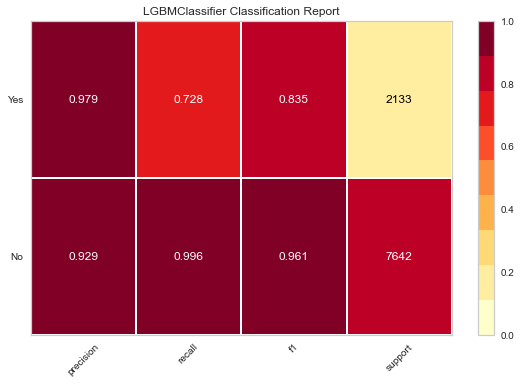

In [53]:
# Plotting the classification report
plot_model(tuned_LGBM,plot='class_report')

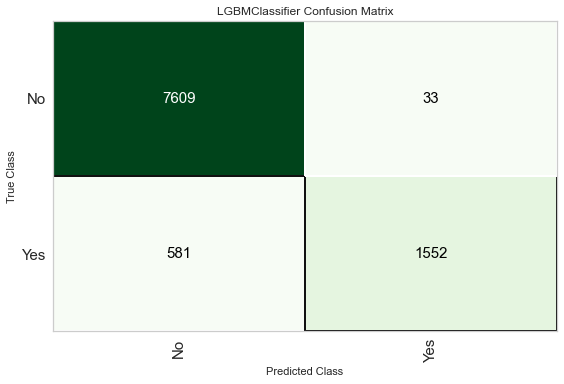

In [54]:
# Plotting the confusion matrix
plot_model(tuned_LGBM,plot='confusion_matrix')

### Finalize Model 

In [55]:
final_model = finalize_model(tuned_LGBM)
print(final_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predict On Unseen Data

In [56]:
# New Unseen Data
new_data = Credits.copy()
unseen_predictions = predict_model(final_model, data=new_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9732,0,0,0,0,0


,Age,Income,Loan Amount,Credit History,EMP Length,Loan Int Rate,Loan Percent Inc,Home Ownership,Loan Intent,Loan Grade,Loan Status,Default,Label,Score
0,22,59000,35000,3,123.0,16.02,0.59,RENT,PERSONAL,D,Yes,Y,Yes,0.9954
1,21,9600,1000,2,5.0,11.14,0.10,OWN,EDUCATION,B,No,N,No,0.9777
2,25,9600,5500,3,1.0,12.87,0.57,MORTGAGE,MEDICAL,C,Yes,N,Yes,0.9956
3,23,65500,35000,2,4.0,15.23,0.53,RENT,MEDICAL,C,Yes,N,Yes,0.9953
4,24,54400,35000,4,8.0,14.27,0.55,RENT,MEDICAL,C,Yes,Y,Yes,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,30,1.0,13.16,0.11,MORTGAGE,PERSONAL,C,No,N,No,0.9066
32577,54,120000,17625,19,4.0,7.49,0.15,MORTGAGE,PERSONAL,A,No,N,No,0.9869
32578,65,76000,35000,28,3.0,10.99,0.46,RENT,HOMEIMPROVEMENT,B,Yes,N,Yes,0.9770
32579,56,150000,15000,26,5.0,11.48,0.10,MORTGAGE,PERSONAL,B,No,N,No,0.9204
